In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
yal_data = pd.read_csv("data/YAL-01012019-10122021.csv")
yat_data = pd.read_csv("data/YAT-01012019-10122021.csv")

In [34]:
yal_cols = yal_data.columns[2:]
yal_data[yal_cols[0]] = yal_data[yal_cols[0]].str.replace(".","").str.replace(",",".").astype(float)
yal_data[yal_cols[1]] = yal_data[yal_cols[1]].str.replace(".","").str.replace(",",".").astype(float)
yal_data[yal_cols[2]] = yal_data[yal_cols[2]].str.replace(".","").str.replace(",",".").astype(float)
yal_data["yal_total"] = yal_data[yal_cols].sum(axis=1)

In [35]:
yat_cols = yat_data.columns[2:]
yat_data[yat_cols[0]] = yat_data[yat_cols[0]].str.replace(".","").str.replace(",",".").astype(float)
yat_data[yat_cols[1]] = yat_data[yat_cols[1]].str.replace(".","").str.replace(",",".").astype(float)
yat_data[yat_cols[2]] = yat_data[yat_cols[2]].str.replace(".","").str.replace(",",".").astype(float)
yat_data["yat_total"] = yat_data[yat_cols].sum(axis=1)

In [38]:
all_data = yat_data[["Tarih","Saat","yat_total"]].merge(yal_data[["Tarih","Saat","yal_total"]],how="left",on=["Tarih","Saat"])

In [40]:
all_data["balance"] = all_data["yat_total"]-all_data["yal_total"]

In [42]:
def target_class(row):
    if row>50:
        return "Surplus"
    elif (row<=50) & (row>=-50):
        return "Balanced"
    elif row<-50:
        return "Deficit"

In [45]:
all_data["target"] = all_data.balance.apply(lambda row : target_class(row))

In [237]:
all_data["datetime"] = pd.to_datetime(all_data.Tarih + ' ' + all_data.Saat,format = '%d/%m/%Y %H:%M')

/Users/yunus.karatas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


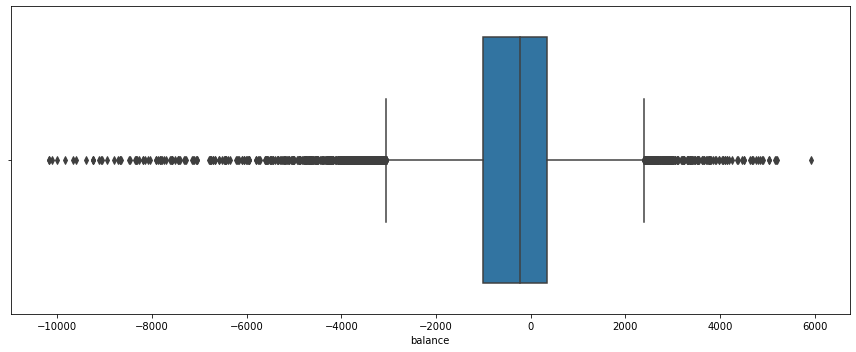

In [241]:
plt.figure(figsize=(12,5))
sns.boxplot(all_data.balance)
plt.tight_layout()
plt.show()

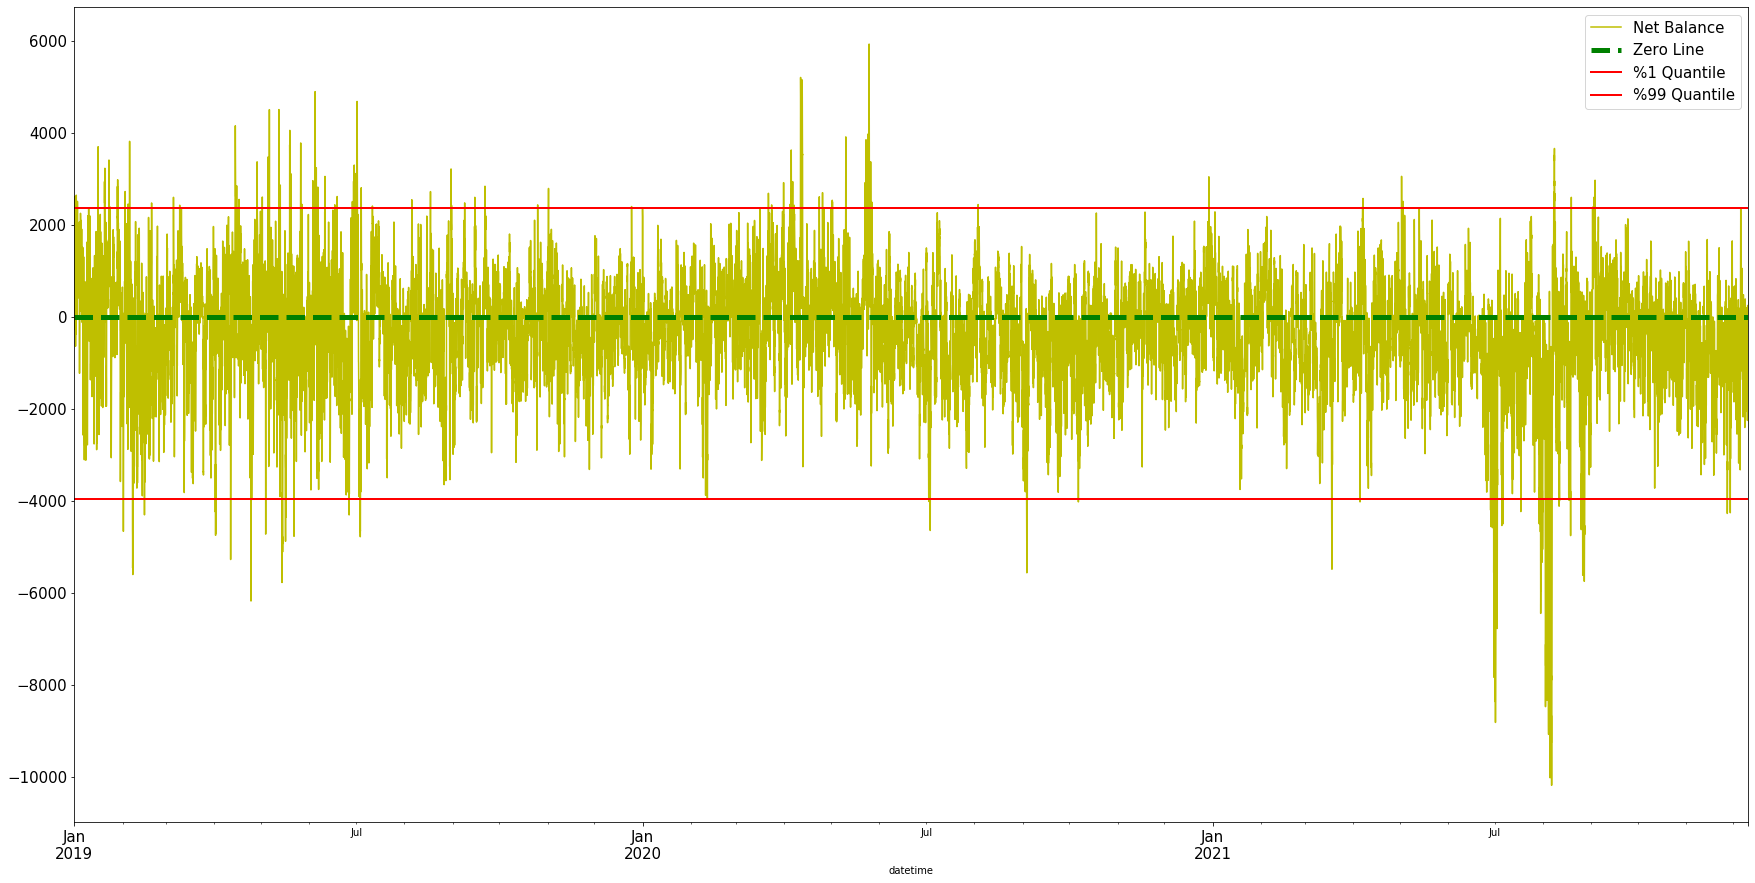

In [242]:
plt.figure(figsize= (30,15))
all_data.set_index("datetime").balance.plot(color = "y",label = "Net Balance")
plt.axhline(y=0, color='g', linestyle='--',linewidth=5,label = "Zero Line")
plt.axhline(y=all_data.balance.quantile(0.01), color='r', linestyle='-',linewidth=2,label="%1 Quantile")
plt.axhline(y=all_data.balance.quantile(0.99), color='r', linestyle='-',linewidth=2,label="%99 Quantile")
plt.legend(prop={'size': 15})
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

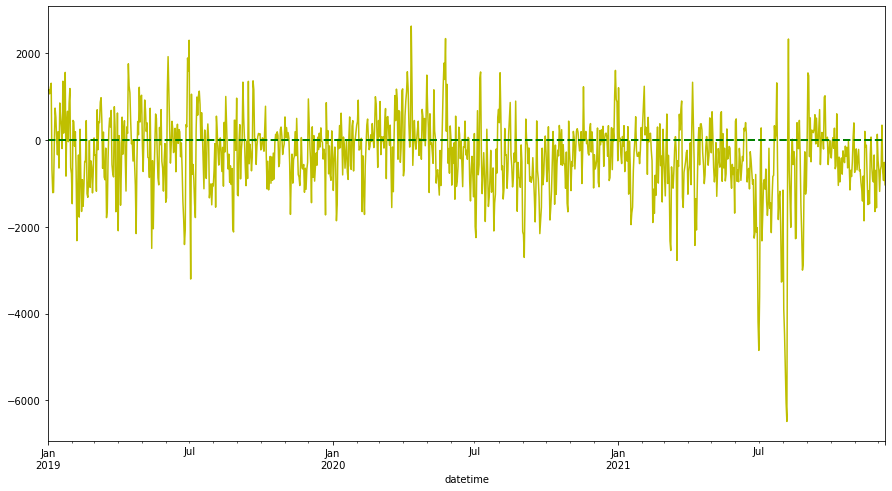

In [243]:
plt.figure(figsize= (15,8))
all_data.set_index("datetime").resample("D").balance.mean().plot(color="y")
plt.axhline(y=0, color='g', linestyle='--',linewidth=2)
plt.show()

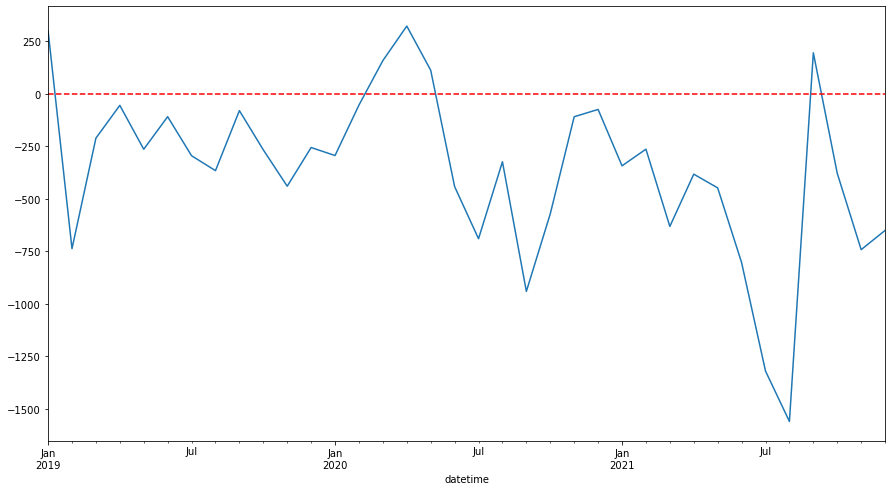

In [244]:
plt.figure(figsize= (15,8))
all_data.set_index("datetime").resample("M").balance.mean().plot()
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

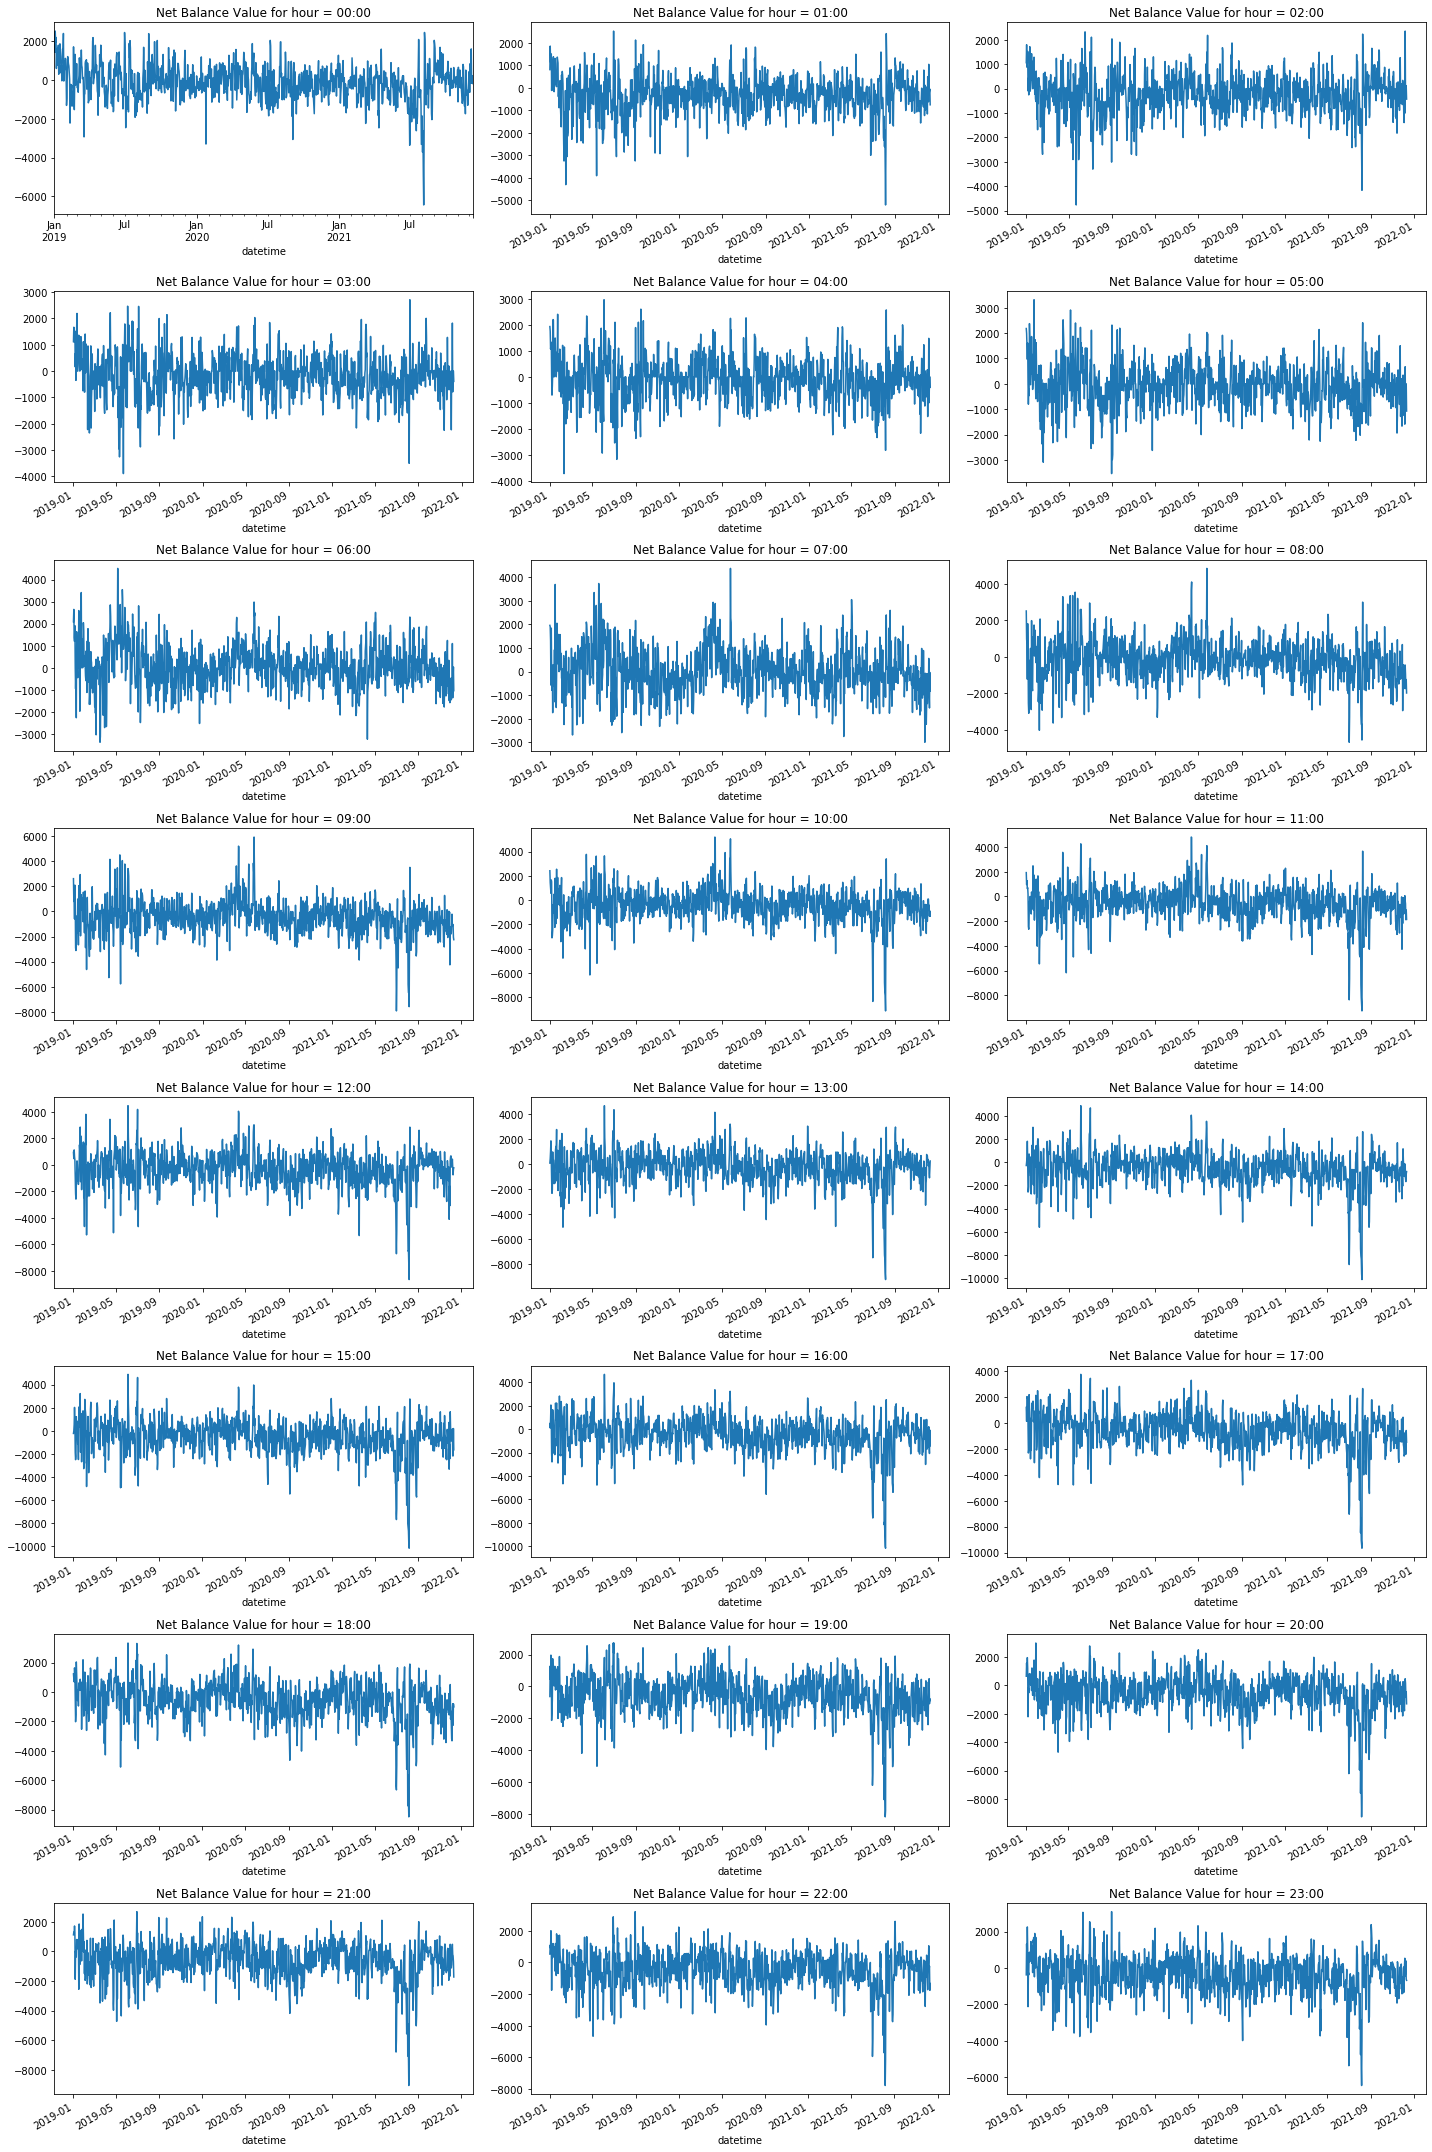

In [245]:
plt.figure(figsize=(20,30))
for i,hour in enumerate(all_data.Saat.unique()):
    hour_data = all_data[all_data["Saat"]==hour]
    plt.subplot(8,3,i+1)
    hour_data.set_index("datetime").balance.plot()
    plt.title(f"Net Balance Value for hour = {hour}")
    plt.tight_layout()

### Hour Analysis

In [246]:
hour_stats = pd.crosstab(all_data.Saat,all_data.target)

In [247]:
hour_stats.columns = ["Balanced occurence","Deficit occurence","Surplus occurence"]

In [248]:
hour_stats["Max Observed Label"] = hour_stats.idxmax(axis=1)
hour_stats["Max Observed Label"] = hour_stats["Max Observed Label"].apply(lambda row : row[:-10])

In [249]:
hour_stats["Balanced Ratio"] = np.round(100*hour_stats[hour_stats.columns[0]]/hour_stats[hour_stats.columns[:3]].sum(axis=1),2)
hour_stats["Deficit Ratio"] = np.round(100*hour_stats[hour_stats.columns[1]]/hour_stats[hour_stats.columns[:3]].sum(axis=1),2)
hour_stats["Surplus Ratio"] = np.round(100*hour_stats[hour_stats.columns[2]]/hour_stats[hour_stats.columns[:3]].sum(axis=1),2)

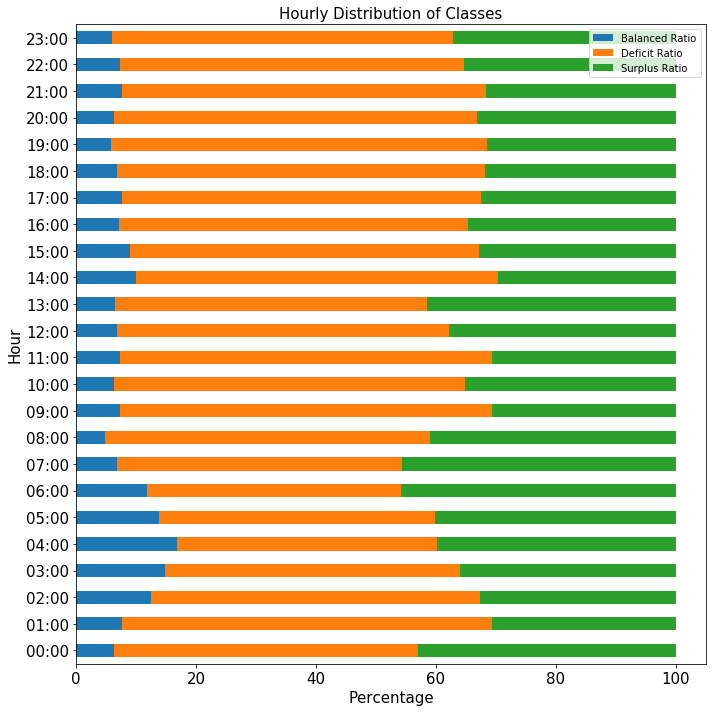

In [250]:

hour_stats[hour_stats.columns[-3:]].plot(
    kind = 'barh',
    stacked = True,
   
    mark_right = True,
figsize=(10,10))
plt.title('Hourly Distribution of Classes',fontsize=15)
plt.legend(loc="best",prop={'size': 10})
plt.yticks(size=15)
plt.xticks(size=15)
plt.xlabel("Percentage",fontsize=15)
plt.ylabel("Hour",fontsize=15)
plt.tight_layout()
plt.show()


In [252]:
hour_stats

,Balanced occurence,Deficit occurence,Surplus occurence,Max Observed Label,Balanced Ratio,Deficit Ratio,Surplus Ratio
Saat,,,,,,,
00:00,67,546,462,Deficit,6.23,50.79,42.98
01:00,82,663,330,Deficit,7.63,61.67,30.70
02:00,134,591,350,Deficit,12.47,54.98,32.56
03:00,160,529,386,Deficit,14.88,49.21,35.91
04:00,180,467,428,Deficit,16.74,43.44,39.81
05:00,149,495,431,Deficit,13.86,46.05,40.09
06:00,127,455,493,Surplus,11.81,42.33,45.86
07:00,73,512,490,Deficit,6.79,47.63,45.58
08:00,51,584,440,Deficit,4.74,54.33,40.93


### WeekDay Analysis

In [253]:
from datetime import date
import calendar

In [254]:
all_data["weekday"] = all_data.datetime.apply(lambda row : calendar.day_name[row.weekday()])

In [255]:
weekday_stats = 100*pd.crosstab(all_data.weekday,all_data.target,normalize="index")

In [256]:
weekday_stats

target,Balanced,Deficit,Surplus
weekday,,,
Friday,8.306277,56.168831,35.524892
Monday,6.181917,58.850763,34.967320
Saturday,8.986928,54.793028,36.220044
Sunday,10.403050,44.498911,45.098039
Thursday,8.333333,58.630952,33.035714
Tuesday,8.495671,60.470779,31.033550
Wednesday,8.576840,56.358225,35.064935


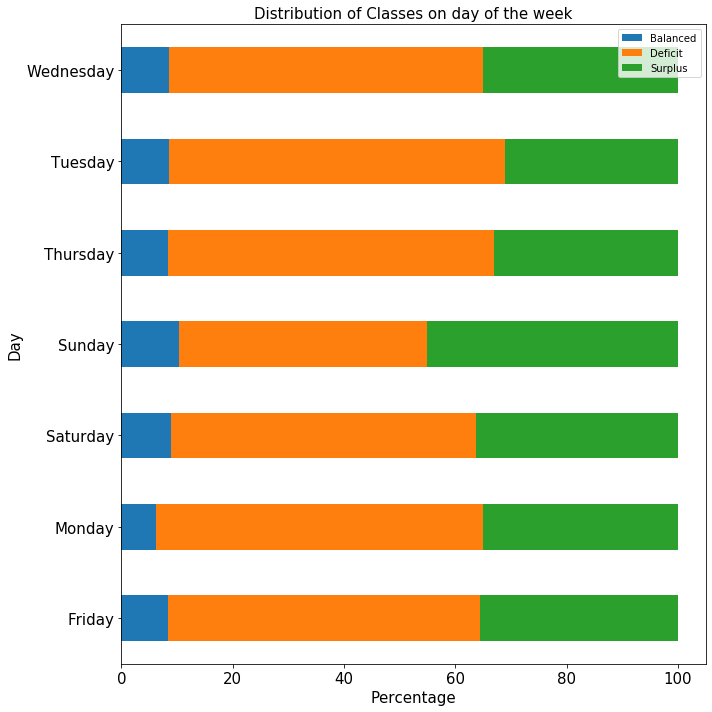

In [257]:

weekday_stats.plot(
    kind = 'barh',
    stacked = True,
   
    mark_right = True,
figsize=(10,10))
plt.title('Distribution of Classes on day of the week',fontsize=15)
plt.legend(loc="best",prop={'size': 10})
plt.yticks(size=15)
plt.xticks(size=15)
plt.xlabel("Percentage",fontsize=15)
plt.ylabel("Day",fontsize=15)
plt.tight_layout()
plt.show()


### In the Month Analysis

In [258]:
all_data["dayofmonth"] = all_data.datetime.apply(lambda row : row.strftime("%d")).astype(int)

In [259]:
all_data["month"] = all_data.datetime.apply(lambda row : str(row.year) + "_"+  str(row.month))

In [277]:
all_data["weekofmonth"] = all_data.groupby("month").dayofmonth.transform(lambda row : (row//7)+1)#.transform(lambda row : row.dayofmonth/7,axis=1)

In [283]:
all_data["target_numeric"] = all_data.target.replace({"Surplus":1,"Balanced":0,"Deficit":-1})

In [284]:
all_data[all_data.month=='2019_1']

,Tarih,Saat,yat_total,yal_total,balance,target,datetime,weekday,dayofmonth,month,weekofmonth,target_numeric
0,01/01/2019,00:00,2288.57,0.00,2288.57,Surplus,2019-01-01 00:00:00,Tuesday,1,2019_1,1,1
1,01/01/2019,01:00,808.08,0.00,808.08,Surplus,2019-01-01 01:00:00,Tuesday,1,2019_1,1,1
2,01/01/2019,02:00,1060.75,0.00,1060.75,Surplus,2019-01-01 02:00:00,Tuesday,1,2019_1,1,1
3,01/01/2019,03:00,1120.48,0.00,1120.48,Surplus,2019-01-01 03:00:00,Tuesday,1,2019_1,1,1
4,01/01/2019,04:00,1930.63,0.00,1930.63,Surplus,2019-01-01 04:00:00,Tuesday,1,2019_1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
739,31/01/2019,19:00,7.00,885.00,-878.00,Deficit,2019-01-31 19:00:00,Thursday,31,2019_1,5,-1
740,31/01/2019,20:00,305.80,304.93,0.87,Balanced,2019-01-31 20:00:00,Thursday,31,2019_1,5,0
741,31/01/2019,21:00,648.50,0.00,648.50,Surplus,2019-01-31 21:00:00,Thursday,31,2019_1,5,1
742,31/01/2019,22:00,232.83,0.00,232.83,Surplus,2019-01-31 22:00:00,Thursday,31,2019_1,5,1


In [289]:
column_str = '''client_id text,category_avg_day_diff_snacks double precision,category_stddev_day_diff_snacks double precision,category_avg_day_diff_beverages double precision,category_stddev_day_diff_beverages double precision,category_avg_day_diff_milk__dairy double precision,category_stddev_day_diff_milk__dairy double precision,category_avg_day_diff_food double precision,category_stddev_day_diff_food double precision,high_frequency_product_count_snacks double precision,mid_frequency_product_count_snacks double precision,high_frequency_product_ratio_snacks double precision,mid_frequency_product_ratio_snacks double precision,hour_diff_from_last_high_frequency_product_snacks double precision,hour_diff_from_last_mid_frequency_product_snacks double precision,high_frequency_product_count_beverages double precision,mid_frequency_product_count_beverages double precision,high_frequency_product_ratio_beverages double precision,mid_frequency_product_ratio_beverages double precision,hour_diff_from_last_high_frequency_product_beverages double precision,hour_diff_from_last_mid_frequency_product_beverages double precision,high_frequency_product_count_milk__dairy double precision,mid_frequency_product_count_milk__dairy double precision,high_frequency_product_ratio_milk__dairy double precision,mid_frequency_product_ratio_milk__dairy double precision,hour_diff_from_last_high_frequency_product_milk__dairy double precision,hour_diff_from_last_mid_frequency_product_milk__dairy double precision,high_frequency_product_count_food double precision,mid_frequency_product_count_food double precision,high_frequency_product_ratio_food double precision,mid_frequency_product_ratio_food double precision,hour_diff_from_last_high_frequency_product_food double precision,hour_diff_from_last_mid_frequency_product_food double precision,category_ever_total_contribution_profit_snacks double precision,category_ever_avg_contribution_profit_snacks double precision,category_ever_product_count_snacks double precision,category_ever_first_index_order_count_snacks double precision,category_ever_first_three_index_product_count_snacks double precision,category_ever_suc_order_count_snacks double precision,category_ever_total_aaandm_snacks double precision,category_ever_avg_aandm_snacks double precision,category_ever_total_charged_amount_snacks double precision,category_ever_avg_charged_amount_snacks double precision,category_ever_total_basket_value_snacks double precision,category_ever_avg_basket_value_snacks double precision,category_ever_total_discount_amount_snacks double precision,category_ever_avg_discount_amount_snacks double precision,category_recent_basket_snacks double precision,category_ever_daily_tenure_snacks double precision,category_ever_weekly_tenure_snacks double precision,category_ever_monthly_tenure_snacks double precision,category_ever_active_month_count_snacks double precision,category_ever_active_week_count_snacks double precision,category_ever_active_day_count_snacks double precision,ever_active_month_perc_snacks double precision,ever_active_week_perc_snacks double precision,ever_active_day_perc_snacks double precision,category_first_index_order_ratio_snacks double precision,category_first_three_index_product_ratio_snacks double precision,category_ever_total_contribution_profit_beverages double precision,category_ever_avg_contribution_profit_beverages double precision,category_ever_product_count_beverages double precision,category_ever_first_index_order_count_beverages double precision,category_ever_first_three_index_product_count_beverages double precision,category_ever_suc_order_count_beverages double precision,category_ever_total_aaandm_beverages double precision,category_ever_avg_aandm_beverages double precision,category_ever_total_charged_amount_beverages double precision,category_ever_avg_charged_amount_beverages double precision,category_ever_total_basket_value_beverages double precision,category_ever_avg_basket_value_beverages double precision,category_ever_total_discount_amount_beverages double precision,category_ever_avg_discount_amount_beverages double precision,category_recent_basket_beverages double precision,category_ever_daily_tenure_beverages double precision,category_ever_weekly_tenure_beverages double precision,category_ever_monthly_tenure_beverages double precision,category_ever_active_month_count_beverages double precision,category_ever_active_week_count_beverages double precision,category_ever_active_day_count_beverages double precision,ever_active_month_perc_beverages double precision,ever_active_week_perc_beverages double precision,ever_active_day_perc_beverages double precision,category_first_index_order_ratio_beverages double precision,category_first_three_index_product_ratio_beverages double precision,category_ever_total_contribution_profit_milk__dairy double precision,category_ever_avg_contribution_profit_milk__dairy double precision,category_ever_product_count_milk__dairy double precision,category_ever_first_index_order_count_milk__dairy double precision,category_ever_first_three_index_product_count_milk__dairy double precision,category_ever_suc_order_count_milk__dairy double precision,category_ever_total_aaandm_milk__dairy double precision,category_ever_avg_aandm_milk__dairy double precision,category_ever_total_charged_amount_milk__dairy double precision,category_ever_avg_charged_amount_milk__dairy double precision,category_ever_total_basket_value_milk__dairy double precision,category_ever_avg_basket_value_milk__dairy double precision,category_ever_total_discount_amount_milk__dairy double precision,category_ever_avg_discount_amount_milk__dairy double precision,category_recent_basket_milk__dairy double precision,category_ever_daily_tenure_milk__dairy double precision,category_ever_weekly_tenure_milk__dairy double precision,category_ever_monthly_tenure_milk__dairy double precision,category_ever_active_month_count_milk__dairy double precision,category_ever_active_week_count_milk__dairy double precision,category_ever_active_day_count_milk__dairy double precision,ever_active_month_perc_milk__dairy double precision,ever_active_week_perc_milk__dairy double precision,ever_active_day_perc_milk__dairy double precision,category_first_index_order_ratio_milk__dairy double precision,category_first_three_index_product_ratio_milk__dairy double precision,category_ever_total_contribution_profit_food double precision,category_ever_avg_contribution_profit_food double precision,category_ever_product_count_food double precision,category_ever_first_index_order_count_food double precision,category_ever_first_three_index_product_count_food double precision,category_ever_suc_order_count_food double precision,category_ever_total_aaandm_food double precision,category_ever_avg_aandm_food double precision,category_ever_total_charged_amount_food double precision,category_ever_avg_charged_amount_food double precision,category_ever_total_basket_value_food double precision,category_ever_avg_basket_value_food double precision,category_ever_total_discount_amount_food double precision,category_ever_avg_discount_amount_food double precision,category_recent_basket_food double precision,category_ever_daily_tenure_food double precision,category_ever_weekly_tenure_food double precision,category_ever_monthly_tenure_food double precision,category_ever_active_month_count_food double precision,category_ever_active_week_count_food double precision,category_ever_active_day_count_food double precision,ever_active_month_perc_food double precision,ever_active_week_perc_food double precision,ever_active_day_perc_food double precision,category_first_index_order_ratio_food double precision,category_first_three_index_product_ratio_food double precision,product_order_count_top1_snacks double precision,hour_diff_product_last_checkout_top1_snacks double precision,total_product_count_top1_snacks double precision,total_product_basket_value_top1_snacks double precision,avg_product_basket_value_top1_snacks double precision,total_product_charged_amount_top1_snacks double precision,avg_product_charged_amount_top1_snacks double precision,total_product_contribution_profit_top1_snacks double precision,avg_product_contribution_profit_top1_snacks double precision,avg_product_hour_diff_top1_snacks double precision,median_product_hour_diff_top1_snacks double precision,stddev_product_hour_diff_top1_snacks double precision,product_order_count_top2_snacks double precision,hour_diff_product_last_checkout_top2_snacks double precision,total_product_count_top2_snacks double precision,total_product_basket_value_top2_snacks double precision,avg_product_basket_value_top2_snacks double precision,total_product_charged_amount_top2_snacks double precision,avg_product_charged_amount_top2_snacks double precision,total_product_contribution_profit_top2_snacks double precision,avg_product_contribution_profit_top2_snacks double precision,avg_product_hour_diff_top2_snacks double precision,median_product_hour_diff_top2_snacks double precision,stddev_product_hour_diff_top2_snacks double precision,product_order_count_top3_snacks double precision,hour_diff_product_last_checkout_top3_snacks double precision,total_product_count_top3_snacks double precision,total_product_basket_value_top3_snacks double precision,avg_product_basket_value_top3_snacks double precision,total_product_charged_amount_top3_snacks double precision,avg_product_charged_amount_top3_snacks double precision,total_product_contribution_profit_top3_snacks double precision,avg_product_contribution_profit_top3_snacks double precision,avg_product_hour_diff_top3_snacks double precision,median_product_hour_diff_top3_snacks double precision,stddev_product_hour_diff_top3_snacks double precision,product_order_count_top1_beverages double precision,hour_diff_product_last_checkout_top1_beverages double precision,total_product_count_top1_beverages double precision,total_product_basket_value_top1_beverages double precision,avg_product_basket_value_top1_beverages double precision,total_product_charged_amount_top1_beverages double precision,avg_product_charged_amount_top1_beverages double precision,total_product_contribution_profit_top1_beverages double precision,avg_product_contribution_profit_top1_beverages double precision,avg_product_hour_diff_top1_beverages double precision,median_product_hour_diff_top1_beverages double precision,stddev_product_hour_diff_top1_beverages double precision,product_order_count_top2_beverages double precision,hour_diff_product_last_checkout_top2_beverages double precision,total_product_count_top2_beverages double precision,total_product_basket_value_top2_beverages double precision,avg_product_basket_value_top2_beverages double precision,total_product_charged_amount_top2_beverages double precision,avg_product_charged_amount_top2_beverages double precision,total_product_contribution_profit_top2_beverages double precision,avg_product_contribution_profit_top2_beverages double precision,avg_product_hour_diff_top2_beverages double precision,median_product_hour_diff_top2_beverages double precision,stddev_product_hour_diff_top2_beverages double precision,product_order_count_top3_beverages double precision,hour_diff_product_last_checkout_top3_beverages double precision,total_product_count_top3_beverages double precision,total_product_basket_value_top3_beverages double precision,avg_product_basket_value_top3_beverages double precision,total_product_charged_amount_top3_beverages double precision,avg_product_charged_amount_top3_beverages double precision,total_product_contribution_profit_top3_beverages double precision,avg_product_contribution_profit_top3_beverages double precision,avg_product_hour_diff_top3_beverages double precision,median_product_hour_diff_top3_beverages double precision,stddev_product_hour_diff_top3_beverages double precision,product_order_count_top1_milk__dairy double precision,hour_diff_product_last_checkout_top1_milk__dairy double precision,total_product_count_top1_milk__dairy double precision,total_product_basket_value_top1_milk__dairy double precision,avg_product_basket_value_top1_milk__dairy double precision,total_product_charged_amount_top1_milk__dairy double precision,avg_product_charged_amount_top1_milk__dairy double precision,total_product_contribution_profit_top1_milk__dairy double precision,avg_product_contribution_profit_top1_milk__dairy double precision,avg_product_hour_diff_top1_milk__dairy double precision,median_product_hour_diff_top1_milk__dairy double precision,stddev_product_hour_diff_top1_milk__dairy text,product_order_count_top2_milk__dairy double precision,hour_diff_product_last_checkout_top2_milk__dairy double precision,total_product_count_top2_milk__dairy double precision,total_product_basket_value_top2_milk__dairy double precision,avg_product_basket_value_top2_milk__dairy double precision,total_product_charged_amount_top2_milk__dairy double precision,avg_product_charged_amount_top2_milk__dairy double precision,total_product_contribution_profit_top2_milk__dairy double precision,avg_product_contribution_profit_top2_milk__dairy double precision,avg_product_hour_diff_top2_milk__dairy double precision,median_product_hour_diff_top2_milk__dairy double precision,stddev_product_hour_diff_top2_milk__dairy text,product_order_count_top3_milk__dairy double precision,hour_diff_product_last_checkout_top3_milk__dairy double precision,total_product_count_top3_milk__dairy double precision,total_product_basket_value_top3_milk__dairy double precision,avg_product_basket_value_top3_milk__dairy double precision,total_product_charged_amount_top3_milk__dairy double precision,avg_product_charged_amount_top3_milk__dairy double precision,total_product_contribution_profit_top3_milk__dairy double precision,avg_product_contribution_profit_top3_milk__dairy double precision,avg_product_hour_diff_top3_milk__dairy double precision,median_product_hour_diff_top3_milk__dairy double precision,stddev_product_hour_diff_top3_milk__dairy text,product_order_count_top1_food double precision,hour_diff_product_last_checkout_top1_food double precision,total_product_count_top1_food double precision,total_product_basket_value_top1_food double precision,avg_product_basket_value_top1_food double precision,total_product_charged_amount_top1_food double precision,avg_product_charged_amount_top1_food double precision,total_product_contribution_profit_top1_food double precision,avg_product_contribution_profit_top1_food double precision,avg_product_hour_diff_top1_food double precision,median_product_hour_diff_top1_food double precision,stddev_product_hour_diff_top1_food text,product_order_count_top2_food double precision,hour_diff_product_last_checkout_top2_food double precision,total_product_count_top2_food double precision,total_product_basket_value_top2_food double precision,avg_product_basket_value_top2_food double precision,total_product_charged_amount_top2_food double precision,avg_product_charged_amount_top2_food double precision,total_product_contribution_profit_top2_food double precision,avg_product_contribution_profit_top2_food double precision,avg_product_hour_diff_top2_food double precision,median_product_hour_diff_top2_food double precision,stddev_product_hour_diff_top2_food text,product_order_count_top3_food double precision,hour_diff_product_last_checkout_top3_food double precision,total_product_count_top3_food double precision,total_product_basket_value_top3_food double precision,avg_product_basket_value_top3_food double precision,total_product_charged_amount_top3_food double precision,avg_product_charged_amount_top3_food double precision,total_product_contribution_profit_top3_food double precision,avg_product_contribution_profit_top3_food double precision,avg_product_hour_diff_top3_food text,median_product_hour_diff_top3_food text,stddev_product_hour_diff_top3_food text,last_3m_order_count_snacks double precision,last_3m_total_charged_amount_snacks double precision,last_3m_avg_charged_amount_snacks double precision,last_3m_total_discount_amount_snacks double precision,last_3m_avg_discount_amount_snacks double precision,last_3m_total_cp_amount_snacks double precision,last_3m_avg_cp_amount_snacks double precision,last_week_order_count_snacks double precision,has_last_week_order_snacks double precision,last_15_days_order_count_snacks double precision,has_last_15_days_order_snacks double precision,last_3m_avg_delivery_fee_snacks double precision,last_3m_delivery_fee_order_count_snacks double precision,last_3m_avg_delivery_min_snacks double precision,last_3m_max_delivery_min_snacks double precision,last_3m_negative_order_count_snacks double precision,last_3m_negative_order_perc_snacks double precision,last_3m_avg_hour_diff_from_prev_order_snacks double precision,last_3m_max_hour_diff_from_prev_order_snacks double precision,last_3m_min_hour_diff_from_prev_order_snacks double precision,last_3m_night_order_count_snacks double precision,last_3m_night_order_perc_snacks double precision,last_3m_morning_order_count_snacks double precision,last_3m_morning_order_perc_snacks double precision,last_3m_weekend_order_count_snacks double precision,last_3m_weekend_order_perc_snacks double precision,last_3m_discount_0_20_order_count_snacks double precision,last_3m_discount_0_20_order_perc_snacks double precision,last_3m_discount_20_50_order_count_snacks double precision,last_3m_discount_20_50_order_perc_snacks double precision,last_3m_discount_50plus_order_count_snacks double precision,last_3m_discount_50plus_order_perc_snacks double precision,last_3m_usage_type_1_promo_order_count_snacks double precision,last_3m_app_open_day_count_snacks double precision,last_3m_app_open_total_count_snacks double precision,last_3m_app_open_order_conversion_snacks double precision,day_after_last_app_open_snacks double precision,has_last_week_app_open_snacks double precision,has_last_15_days_app_open_snacks double precision,total_sf_discount_amount_snacks double precision,total_gf_discount_amount_snacks double precision,avg_sf_discount_amount_snacks double precision,avg_gf_discount_amount_snacks double precision,total_sf_order_count_snacks double precision,total_gf_order_count_snacks double precision,ever_acquisition_order_count_snacks double precision,ever_habit_building_order_count_snacks double precision,ever_upsell_frequency_order_count_snacks double precision,ever_upsell_basket_order_count_snacks double precision,ever_activation_watchout_order_count_snacks double precision,ever_activation_reactivate_churn_order_count_snacks double precision,ever_activation_reactivate_cohort_order_count_snacks double precision,ever_discount_coupon_order_count_snacks double precision,ptop_order_count_snacks double precision,ptotl_order_count_snacks double precision,tltotl_order_count_snacks double precision,tltop_order_count_snacks double precision,last_3m_order_count_beverages double precision,last_3m_total_charged_amount_beverages double precision,last_3m_avg_charged_amount_beverages double precision,last_3m_total_discount_amount_beverages double precision,last_3m_avg_discount_amount_beverages double precision,last_3m_total_cp_amount_beverages double precision,last_3m_avg_cp_amount_beverages double precision,last_week_order_count_beverages double precision,has_last_week_order_beverages double precision,last_15_days_order_count_beverages double precision,has_last_15_days_order_beverages double precision,last_3m_avg_delivery_fee_beverages double precision,last_3m_delivery_fee_order_count_beverages double precision,last_3m_avg_delivery_min_beverages double precision,last_3m_max_delivery_min_beverages double precision,last_3m_negative_order_count_beverages double precision,last_3m_negative_order_perc_beverages double precision,last_3m_avg_hour_diff_from_prev_order_beverages double precision,last_3m_max_hour_diff_from_prev_order_beverages double precision,last_3m_min_hour_diff_from_prev_order_beverages double precision,last_3m_night_order_count_beverages double precision,last_3m_night_order_perc_beverages double precision,last_3m_morning_order_count_beverages double precision,last_3m_morning_order_perc_beverages double precision,last_3m_weekend_order_count_beverages double precision,last_3m_weekend_order_perc_beverages double precision,last_3m_discount_0_20_order_count_beverages double precision,last_3m_discount_0_20_order_perc_beverages double precision,last_3m_discount_20_50_order_count_beverages double precision,last_3m_discount_20_50_order_perc_beverages double precision,last_3m_discount_50plus_order_count_beverages double precision,last_3m_discount_50plus_order_perc_beverages double precision,last_3m_usage_type_1_promo_order_count_beverages double precision,last_3m_app_open_day_count_beverages double precision,last_3m_app_open_total_count_beverages double precision,last_3m_app_open_order_conversion_beverages double precision,day_after_last_app_open_beverages double precision,has_last_week_app_open_beverages double precision,has_last_15_days_app_open_beverages double precision,total_sf_discount_amount_beverages double precision,total_gf_discount_amount_beverages double precision,avg_sf_discount_amount_beverages double precision,avg_gf_discount_amount_beverages double precision,total_sf_order_count_beverages double precision,total_gf_order_count_beverages double precision,ever_acquisition_order_count_beverages double precision,ever_habit_building_order_count_beverages double precision,ever_upsell_frequency_order_count_beverages double precision,ever_upsell_basket_order_count_beverages double precision,ever_activation_watchout_order_count_beverages double precision,ever_activation_reactivate_churn_order_count_beverages double precision,ever_activation_reactivate_cohort_order_count_beverages double precision,ever_discount_coupon_order_count_beverages double precision,ptop_order_count_beverages double precision,ptotl_order_count_beverages double precision,tltotl_order_count_beverages double precision,tltop_order_count_beverages double precision,last_3m_order_count_milk__dairy double precision,last_3m_total_charged_amount_milk__dairy double precision,last_3m_avg_charged_amount_milk__dairy double precision,last_3m_total_discount_amount_milk__dairy double precision,last_3m_avg_discount_amount_milk__dairy double precision,last_3m_total_cp_amount_milk__dairy double precision,last_3m_avg_cp_amount_milk__dairy double precision,last_week_order_count_milk__dairy double precision,has_last_week_order_milk__dairy double precision,last_15_days_order_count_milk__dairy double precision,has_last_15_days_order_milk__dairy double precision,last_3m_avg_delivery_fee_milk__dairy double precision,last_3m_delivery_fee_order_count_milk__dairy double precision,last_3m_avg_delivery_min_milk__dairy double precision,last_3m_max_delivery_min_milk__dairy double precision,last_3m_negative_order_count_milk__dairy double precision,last_3m_negative_order_perc_milk__dairy double precision,last_3m_avg_hour_diff_from_prev_order_milk__dairy double precision,last_3m_max_hour_diff_from_prev_order_milk__dairy double precision,last_3m_min_hour_diff_from_prev_order_milk__dairy double precision,last_3m_night_order_count_milk__dairy double precision,last_3m_night_order_perc_milk__dairy double precision,last_3m_morning_order_count_milk__dairy double precision,last_3m_morning_order_perc_milk__dairy double precision,last_3m_weekend_order_count_milk__dairy double precision,last_3m_weekend_order_perc_milk__dairy double precision,last_3m_discount_0_20_order_count_milk__dairy double precision,last_3m_discount_0_20_order_perc_milk__dairy double precision,last_3m_discount_20_50_order_count_milk__dairy double precision,last_3m_discount_20_50_order_perc_milk__dairy double precision,last_3m_discount_50plus_order_count_milk__dairy double precision,last_3m_discount_50plus_order_perc_milk__dairy double precision,last_3m_usage_type_1_promo_order_count_milk__dairy double precision,last_3m_app_open_day_count_milk__dairy double precision,last_3m_app_open_total_count_milk__dairy double precision,last_3m_app_open_order_conversion_milk__dairy double precision,day_after_last_app_open_milk__dairy double precision,has_last_week_app_open_milk__dairy double precision,has_last_15_days_app_open_milk__dairy double precision,total_sf_discount_amount_milk__dairy double precision,total_gf_discount_amount_milk__dairy double precision,avg_sf_discount_amount_milk__dairy double precision,avg_gf_discount_amount_milk__dairy double precision,total_sf_order_count_milk__dairy double precision,total_gf_order_count_milk__dairy double precision,ever_acquisition_order_count_milk__dairy double precision,ever_habit_building_order_count_milk__dairy double precision,ever_upsell_frequency_order_count_milk__dairy double precision,ever_upsell_basket_order_count_milk__dairy double precision,ever_activation_watchout_order_count_milk__dairy double precision,ever_activation_reactivate_churn_order_count_milk__dairy double precision,ever_activation_reactivate_cohort_order_count_milk__dairy double precision,ever_discount_coupon_order_count_milk__dairy double precision,ptop_order_count_milk__dairy double precision,ptotl_order_count_milk__dairy double precision,tltotl_order_count_milk__dairy double precision,tltop_order_count_milk__dairy double precision,last_3m_order_count_food double precision,last_3m_total_charged_amount_food double precision,last_3m_avg_charged_amount_food double precision,last_3m_total_discount_amount_food double precision,last_3m_avg_discount_amount_food double precision,last_3m_total_cp_amount_food double precision,last_3m_avg_cp_amount_food double precision,last_week_order_count_food double precision,has_last_week_order_food double precision,last_15_days_order_count_food double precision,has_last_15_days_order_food double precision,last_3m_avg_delivery_fee_food double precision,last_3m_delivery_fee_order_count_food double precision,last_3m_avg_delivery_min_food double precision,last_3m_max_delivery_min_food double precision,last_3m_negative_order_count_food double precision,last_3m_negative_order_perc_food double precision,last_3m_avg_hour_diff_from_prev_order_food double precision,last_3m_max_hour_diff_from_prev_order_food double precision,last_3m_min_hour_diff_from_prev_order_food double precision,last_3m_night_order_count_food double precision,last_3m_night_order_perc_food double precision,last_3m_morning_order_count_food double precision,last_3m_morning_order_perc_food double precision,last_3m_weekend_order_count_food double precision,last_3m_weekend_order_perc_food double precision,last_3m_discount_0_20_order_count_food double precision,last_3m_discount_0_20_order_perc_food double precision,last_3m_discount_20_50_order_count_food double precision,last_3m_discount_20_50_order_perc_food double precision,last_3m_discount_50plus_order_count_food double precision,last_3m_discount_50plus_order_perc_food double precision,last_3m_usage_type_1_promo_order_count_food double precision,last_3m_app_open_day_count_food double precision,last_3m_app_open_total_count_food double precision,last_3m_app_open_order_conversion_food double precision,day_after_last_app_open_food double precision,has_last_week_app_open_food double precision,has_last_15_days_app_open_food double precision,total_sf_discount_amount_food double precision,total_gf_discount_amount_food double precision,avg_sf_discount_amount_food double precision,avg_gf_discount_amount_food double precision,total_sf_order_count_food double precision,total_gf_order_count_food double precision,ever_acquisition_order_count_food double precision,ever_habit_building_order_count_food double precision,ever_upsell_frequency_order_count_food double precision,ever_upsell_basket_order_count_food double precision,ever_activation_watchout_order_count_food double precision,ever_activation_reactivate_churn_order_count_food double precision,ever_activation_reactivate_cohort_order_count_food double precision,ever_discount_coupon_order_count_food double precision,ptop_order_count_food double precision,ptotl_order_count_food double precision,tltotl_order_count_food double precision,tltop_order_count_food double precision,category_total_contribution_profit_t_1_snacks double precision,category_avg_contribution_profit_t_1_snacks double precision,category_product_count_t_1_snacks double precision,category_first_index_order_count_t_1_snacks double precision,category_first_three_index_product_count_t_1_snacks double precision,category_suc_order_count_t_1_snacks double precision,category_avg_gross_margin_t_1_snacks double precision,category_total_financial_aaandm_t_1_snacks double precision,category_avg_financial_aandm_t_1_snacks double precision,category_total_financial_chargedamount_t_1_snacks double precision,category_avg_financial_chargedamount_t_1_snacks double precision,category_recent_basket_t_1_snacks double precision,category_first_index_order_ratio_t_1_snacks double precision,category_first_three_index_product_ratio_t_1_snacks double precision,category_total_contribution_profit_t_2_snacks double precision,category_avg_contribution_profit_t_2_snacks double precision,category_product_count_t_2_snacks double precision,category_first_index_order_count_t_2_snacks double precision,category_first_three_index_product_count_t_2_snacks double precision,category_suc_order_count_t_2_snacks double precision,category_avg_gross_margin_t_2_snacks double precision,category_total_financial_aaandm_t_2_snacks double precision,category_avg_financial_aandm_t_2_snacks double precision,category_total_financial_chargedamount_t_2_snacks double precision,category_avg_financial_chargedamount_t_2_snacks double precision,category_recent_basket_t_2_snacks double precision,category_first_index_order_ratio_t_2_snacks double precision,category_first_three_index_product_ratio_t_2_snacks double precision,category_total_contribution_profit_t_3_snacks double precision,category_avg_contribution_profit_t_3_snacks double precision,category_product_count_t_3_snacks double precision,category_first_index_order_count_t_3_snacks double precision,category_first_three_index_product_count_t_3_snacks double precision,category_suc_order_count_t_3_snacks double precision,category_avg_gross_margin_t_3_snacks double precision,category_total_financial_aaandm_t_3_snacks double precision,category_avg_financial_aandm_t_3_snacks double precision,category_total_financial_chargedamount_t_3_snacks double precision,category_avg_financial_chargedamount_t_3_snacks double precision,category_recent_basket_t_3_snacks double precision,category_first_index_order_ratio_t_3_snacks double precision,category_first_three_index_product_ratio_t_3_snacks double precision,category_total_contribution_profit_t_4_snacks double precision,category_avg_contribution_profit_t_4_snacks double precision,category_product_count_t_4_snacks double precision,category_first_index_order_count_t_4_snacks double precision,category_first_three_index_product_count_t_4_snacks double precision,category_suc_order_count_t_4_snacks double precision,category_avg_gross_margin_t_4_snacks double precision,category_total_financial_aaandm_t_4_snacks double precision,category_avg_financial_aandm_t_4_snacks double precision,category_total_financial_chargedamount_t_4_snacks double precision,category_avg_financial_chargedamount_t_4_snacks double precision,category_recent_basket_t_4_snacks double precision,category_first_index_order_ratio_t_4_snacks double precision,category_first_three_index_product_ratio_t_4_snacks double precision,category_total_contribution_profit_t_5_snacks double precision,category_avg_contribution_profit_t_5_snacks double precision,category_product_count_t_5_snacks double precision,category_first_index_order_count_t_5_snacks double precision,category_first_three_index_product_count_t_5_snacks double precision,category_suc_order_count_t_5_snacks double precision,category_avg_gross_margin_t_5_snacks double precision,category_total_financial_aaandm_t_5_snacks double precision,category_avg_financial_aandm_t_5_snacks double precision,category_total_financial_chargedamount_t_5_snacks double precision,category_avg_financial_chargedamount_t_5_snacks double precision,category_recent_basket_t_5_snacks double precision,category_first_index_order_ratio_t_5_snacks double precision,category_first_three_index_product_ratio_t_5_snacks double precision,category_total_contribution_profit_t_6_snacks double precision,category_avg_contribution_profit_t_6_snacks double precision,category_product_count_t_6_snacks double precision,category_first_index_order_count_t_6_snacks double precision,category_first_three_index_product_count_t_6_snacks double precision,category_suc_order_count_t_6_snacks double precision,category_avg_gross_margin_t_6_snacks double precision,category_total_financial_aaandm_t_6_snacks double precision,category_avg_financial_aandm_t_6_snacks double precision,category_total_financial_chargedamount_t_6_snacks double precision,category_avg_financial_chargedamount_t_6_snacks double precision,category_recent_basket_t_6_snacks double precision,category_first_index_order_ratio_t_6_snacks double precision,category_first_three_index_product_ratio_t_6_snacks double precision,prop_label double precision,churn_label double precision,run_date timestamp'''

In [290]:
pandas_to_sql_type_mapping = {"boolean": "boolean",
                               "object": "text",
                              "string": "text",
                              "int": "double precision",
                              "float": "double precision",
                              "float8": "double precision",
                              "float64" : "double precision",
                              "float32" : "double precision",
                              "float16" : "double precision",
                               "int64" : "double precision",
                              "int32" : "double precision",
                              "int16" : "double precision",
                              "datetime": "timestamp",
          
                              "timestamp": "timestamp",
                             'datetime64[ns]': "timestamp"}

In [299]:
diff_types = list(np.unique(list(pandas_to_sql_type_mapping.values())))

In [300]:
for i in diff_types:
    column_str = column_str.replace(i,"")

In [305]:
cat_features = [i.strip() for i in column_str.split(",")]

In [307]:
client_str = '''client_id text,order_count_t_1 double precision,negative_order_count_t_1 double precision,app_open_day_count_t_1 double precision,promo_applied_order_count_t_1 double precision,total_charged_amount_t_1 double precision,min_charged_amount_t_1 double precision,max_charged_amount_t_1 double precision,charge_amount_without_coupon_t_1 double precision,total_aandm_t_1 double precision,total_discount_amount_t_1 double precision,avg_discount_amount_t_1 double precision,discount_coupon_discount_amount_t_1 double precision,discount_amount_without_coupon_t_1 double precision,avg_basket_value_t_1 double precision,total_basket_value_t_1 double precision,min_basket_value_t_1 double precision,max_basket_value_t_1 double precision,basket_amount_without_coupon_t_1 double precision,delivery_min_30plus_order_count_t_1 double precision,charged_amount_150plus_order_count_t_1 double precision,charged_amount_80_150_order_count_t_1 double precision,ptop_order_count_t_1 double precision,ptotl_order_count_t_1 double precision,tltotl_order_count_t_1 double precision,tltop_order_count_t_1 double precision,discount_coupon_order_count_t_1 double precision,real_promo_applied_order_count_t_1 double precision,yys_order_count_t_1 double precision,total_yys_discount_amount_t_1 text,tip_order_count_t_1 double precision,avg_tip_t_1 text,tip_order_ratio_t_1 double precision,discount_amount_perc_with_coupon_t_1 double precision,discount_amount_perc_without_coupon_t_1 double precision,promo_used_order_perc_t_1 double precision,real_promo_used_perc_t_1 double precision,long_delivery_order_perc_t_1 double precision,app_open_conversion_t_1 double precision,order_count_gb_t_1 double precision,total_basket_value_gb_t_1 double precision,total_discount_amount_gb_t_1 double precision,total_charged_amount_gb_t_1 double precision,order_count_gsu_t_1 double precision,total_basket_value_gsu_t_1 double precision,total_discount_amount_gsu_t_1 double precision,total_charged_amount_gsu_t_1 double precision,order_count_gy_t_1 double precision,total_basket_value_gy_t_1 double precision,total_discount_amount_gy_t_1 double precision,total_charged_amount_gy_t_1 double precision,red_basket_count_t_1 double precision,missed_order_count_t_1 double precision,cancelled_order_count_t_1 double precision,avg_red_basket_checkout_try_count_t_1 double precision,avg_red_basket_checkouttry_to_checkout_min_t_1 double precision,missed_order_perc_t_1 double precision,red_basket_perc_t_1 double precision,cancelled_order_perc_t_1 double precision,order_count_t_2 double precision,negative_order_count_t_2 double precision,app_open_day_count_t_2 double precision,promo_applied_order_count_t_2 double precision,total_charged_amount_t_2 double precision,min_charged_amount_t_2 double precision,max_charged_amount_t_2 double precision,charge_amount_without_coupon_t_2 double precision,total_aandm_t_2 double precision,total_discount_amount_t_2 double precision,avg_discount_amount_t_2 double precision,discount_coupon_discount_amount_t_2 double precision,discount_amount_without_coupon_t_2 double precision,avg_basket_value_t_2 double precision,total_basket_value_t_2 double precision,min_basket_value_t_2 double precision,max_basket_value_t_2 double precision,basket_amount_without_coupon_t_2 double precision,delivery_min_30plus_order_count_t_2 double precision,charged_amount_150plus_order_count_t_2 double precision,charged_amount_80_150_order_count_t_2 double precision,ptop_order_count_t_2 double precision,ptotl_order_count_t_2 double precision,tltotl_order_count_t_2 double precision,tltop_order_count_t_2 double precision,discount_coupon_order_count_t_2 double precision,real_promo_applied_order_count_t_2 double precision,yys_order_count_t_2 double precision,total_yys_discount_amount_t_2 double precision,tip_order_count_t_2 double precision,avg_tip_t_2 double precision,tip_order_ratio_t_2 double precision,discount_amount_perc_with_coupon_t_2 double precision,discount_amount_perc_without_coupon_t_2 double precision,promo_used_order_perc_t_2 double precision,real_promo_used_perc_t_2 double precision,long_delivery_order_perc_t_2 double precision,app_open_conversion_t_2 double precision,order_count_gb_t_2 double precision,total_basket_value_gb_t_2 double precision,total_discount_amount_gb_t_2 double precision,total_charged_amount_gb_t_2 double precision,order_count_gsu_t_2 double precision,total_basket_value_gsu_t_2 double precision,total_discount_amount_gsu_t_2 double precision,total_charged_amount_gsu_t_2 double precision,order_count_gy_t_2 double precision,total_basket_value_gy_t_2 double precision,total_discount_amount_gy_t_2 double precision,total_charged_amount_gy_t_2 double precision,red_basket_count_t_2 double precision,missed_order_count_t_2 double precision,cancelled_order_count_t_2 double precision,avg_red_basket_checkout_try_count_t_2 double precision,avg_red_basket_checkouttry_to_checkout_min_t_2 double precision,missed_order_perc_t_2 double precision,red_basket_perc_t_2 double precision,cancelled_order_perc_t_2 double precision,order_count_t_3 double precision,negative_order_count_t_3 double precision,app_open_day_count_t_3 double precision,promo_applied_order_count_t_3 double precision,total_charged_amount_t_3 double precision,min_charged_amount_t_3 double precision,max_charged_amount_t_3 double precision,charge_amount_without_coupon_t_3 double precision,total_aandm_t_3 double precision,total_discount_amount_t_3 double precision,avg_discount_amount_t_3 double precision,discount_coupon_discount_amount_t_3 double precision,discount_amount_without_coupon_t_3 double precision,avg_basket_value_t_3 double precision,total_basket_value_t_3 double precision,min_basket_value_t_3 double precision,max_basket_value_t_3 double precision,basket_amount_without_coupon_t_3 double precision,delivery_min_30plus_order_count_t_3 double precision,charged_amount_150plus_order_count_t_3 double precision,charged_amount_80_150_order_count_t_3 double precision,ptop_order_count_t_3 double precision,ptotl_order_count_t_3 double precision,tltotl_order_count_t_3 double precision,tltop_order_count_t_3 double precision,discount_coupon_order_count_t_3 double precision,real_promo_applied_order_count_t_3 double precision,yys_order_count_t_3 double precision,total_yys_discount_amount_t_3 double precision,tip_order_count_t_3 double precision,avg_tip_t_3 double precision,tip_order_ratio_t_3 double precision,discount_amount_perc_with_coupon_t_3 double precision,discount_amount_perc_without_coupon_t_3 double precision,promo_used_order_perc_t_3 double precision,real_promo_used_perc_t_3 double precision,long_delivery_order_perc_t_3 double precision,app_open_conversion_t_3 double precision,order_count_gb_t_3 double precision,total_basket_value_gb_t_3 double precision,total_discount_amount_gb_t_3 double precision,total_charged_amount_gb_t_3 double precision,order_count_gsu_t_3 text,total_basket_value_gsu_t_3 text,total_discount_amount_gsu_t_3 text,total_charged_amount_gsu_t_3 text,order_count_gy_t_3 double precision,total_basket_value_gy_t_3 double precision,total_discount_amount_gy_t_3 double precision,total_charged_amount_gy_t_3 double precision,red_basket_count_t_3 double precision,missed_order_count_t_3 double precision,cancelled_order_count_t_3 double precision,avg_red_basket_checkout_try_count_t_3 double precision,avg_red_basket_checkouttry_to_checkout_min_t_3 double precision,missed_order_perc_t_3 double precision,red_basket_perc_t_3 double precision,cancelled_order_perc_t_3 double precision,order_count_t_4 double precision,negative_order_count_t_4 double precision,app_open_day_count_t_4 double precision,promo_applied_order_count_t_4 double precision,total_charged_amount_t_4 double precision,min_charged_amount_t_4 double precision,max_charged_amount_t_4 double precision,charge_amount_without_coupon_t_4 double precision,total_aandm_t_4 double precision,total_discount_amount_t_4 double precision,avg_discount_amount_t_4 double precision,discount_coupon_discount_amount_t_4 double precision,discount_amount_without_coupon_t_4 double precision,avg_basket_value_t_4 double precision,total_basket_value_t_4 double precision,min_basket_value_t_4 double precision,max_basket_value_t_4 double precision,basket_amount_without_coupon_t_4 double precision,delivery_min_30plus_order_count_t_4 double precision,charged_amount_150plus_order_count_t_4 double precision,charged_amount_80_150_order_count_t_4 double precision,ptop_order_count_t_4 double precision,ptotl_order_count_t_4 double precision,tltotl_order_count_t_4 double precision,tltop_order_count_t_4 double precision,discount_coupon_order_count_t_4 double precision,real_promo_applied_order_count_t_4 double precision,yys_order_count_t_4 double precision,total_yys_discount_amount_t_4 text,tip_order_count_t_4 double precision,avg_tip_t_4 double precision,tip_order_ratio_t_4 double precision,discount_amount_perc_with_coupon_t_4 double precision,discount_amount_perc_without_coupon_t_4 double precision,promo_used_order_perc_t_4 double precision,real_promo_used_perc_t_4 double precision,long_delivery_order_perc_t_4 double precision,app_open_conversion_t_4 double precision,order_count_gb_t_4 double precision,total_basket_value_gb_t_4 double precision,total_discount_amount_gb_t_4 double precision,total_charged_amount_gb_t_4 double precision,order_count_gsu_t_4 double precision,total_basket_value_gsu_t_4 double precision,total_discount_amount_gsu_t_4 double precision,total_charged_amount_gsu_t_4 double precision,order_count_gy_t_4 double precision,total_basket_value_gy_t_4 double precision,total_discount_amount_gy_t_4 double precision,total_charged_amount_gy_t_4 double precision,red_basket_count_t_4 double precision,missed_order_count_t_4 double precision,cancelled_order_count_t_4 double precision,avg_red_basket_checkout_try_count_t_4 double precision,avg_red_basket_checkouttry_to_checkout_min_t_4 double precision,missed_order_perc_t_4 double precision,red_basket_perc_t_4 double precision,cancelled_order_perc_t_4 double precision,order_count_t_5 double precision,negative_order_count_t_5 double precision,app_open_day_count_t_5 double precision,promo_applied_order_count_t_5 double precision,total_charged_amount_t_5 double precision,min_charged_amount_t_5 double precision,max_charged_amount_t_5 double precision,charge_amount_without_coupon_t_5 double precision,total_aandm_t_5 double precision,total_discount_amount_t_5 double precision,avg_discount_amount_t_5 double precision,discount_coupon_discount_amount_t_5 double precision,discount_amount_without_coupon_t_5 double precision,avg_basket_value_t_5 double precision,total_basket_value_t_5 double precision,min_basket_value_t_5 double precision,max_basket_value_t_5 double precision,basket_amount_without_coupon_t_5 double precision,delivery_min_30plus_order_count_t_5 double precision,charged_amount_150plus_order_count_t_5 double precision,charged_amount_80_150_order_count_t_5 double precision,ptop_order_count_t_5 double precision,ptotl_order_count_t_5 double precision,tltotl_order_count_t_5 double precision,tltop_order_count_t_5 double precision,discount_coupon_order_count_t_5 double precision,real_promo_applied_order_count_t_5 double precision,yys_order_count_t_5 double precision,total_yys_discount_amount_t_5 double precision,tip_order_count_t_5 double precision,avg_tip_t_5 text,tip_order_ratio_t_5 double precision,discount_amount_perc_with_coupon_t_5 double precision,discount_amount_perc_without_coupon_t_5 double precision,promo_used_order_perc_t_5 double precision,real_promo_used_perc_t_5 double precision,long_delivery_order_perc_t_5 double precision,app_open_conversion_t_5 double precision,order_count_gb_t_5 double precision,total_basket_value_gb_t_5 double precision,total_discount_amount_gb_t_5 double precision,total_charged_amount_gb_t_5 double precision,order_count_gsu_t_5 double precision,total_basket_value_gsu_t_5 double precision,total_discount_amount_gsu_t_5 double precision,total_charged_amount_gsu_t_5 double precision,order_count_gy_t_5 double precision,total_basket_value_gy_t_5 double precision,total_discount_amount_gy_t_5 double precision,total_charged_amount_gy_t_5 double precision,red_basket_count_t_5 double precision,missed_order_count_t_5 double precision,cancelled_order_count_t_5 double precision,avg_red_basket_checkout_try_count_t_5 double precision,avg_red_basket_checkouttry_to_checkout_min_t_5 double precision,missed_order_perc_t_5 double precision,red_basket_perc_t_5 double precision,cancelled_order_perc_t_5 double precision,order_count_t_6 double precision,negative_order_count_t_6 double precision,app_open_day_count_t_6 double precision,promo_applied_order_count_t_6 double precision,total_charged_amount_t_6 double precision,min_charged_amount_t_6 double precision,max_charged_amount_t_6 double precision,charge_amount_without_coupon_t_6 double precision,total_aandm_t_6 double precision,total_discount_amount_t_6 double precision,avg_discount_amount_t_6 double precision,discount_coupon_discount_amount_t_6 double precision,discount_amount_without_coupon_t_6 double precision,avg_basket_value_t_6 double precision,total_basket_value_t_6 double precision,min_basket_value_t_6 double precision,max_basket_value_t_6 double precision,basket_amount_without_coupon_t_6 double precision,delivery_min_30plus_order_count_t_6 double precision,charged_amount_150plus_order_count_t_6 double precision,charged_amount_80_150_order_count_t_6 double precision,ptop_order_count_t_6 double precision,ptotl_order_count_t_6 double precision,tltotl_order_count_t_6 double precision,tltop_order_count_t_6 double precision,discount_coupon_order_count_t_6 double precision,real_promo_applied_order_count_t_6 double precision,yys_order_count_t_6 double precision,total_yys_discount_amount_t_6 double precision,tip_order_count_t_6 double precision,avg_tip_t_6 text,tip_order_ratio_t_6 double precision,discount_amount_perc_with_coupon_t_6 double precision,discount_amount_perc_without_coupon_t_6 double precision,promo_used_order_perc_t_6 double precision,real_promo_used_perc_t_6 double precision,long_delivery_order_perc_t_6 double precision,app_open_conversion_t_6 double precision,order_count_gb_t_6 double precision,total_basket_value_gb_t_6 double precision,total_discount_amount_gb_t_6 double precision,total_charged_amount_gb_t_6 double precision,order_count_gsu_t_6 double precision,total_basket_value_gsu_t_6 double precision,total_discount_amount_gsu_t_6 double precision,total_charged_amount_gsu_t_6 double precision,order_count_gy_t_6 double precision,total_basket_value_gy_t_6 double precision,total_discount_amount_gy_t_6 double precision,total_charged_amount_gy_t_6 double precision,red_basket_count_t_6 double precision,missed_order_count_t_6 double precision,cancelled_order_count_t_6 double precision,avg_red_basket_checkout_try_count_t_6 double precision,avg_red_basket_checkouttry_to_checkout_min_t_6 double precision,missed_order_perc_t_6 double precision,red_basket_perc_t_6 double precision,cancelled_order_perc_t_6 double precision,last_3m_product_count double precision,last_3m_avg_product_count double precision,last_3m_total_charged_amount double precision,su_içecek_basket_perc double precision,atıştırmalık_basket_perc double precision,ev_bakım_basket_perc double precision,süt_kahvaltı_basket_perc double precision,meyve_sebze_basket_perc double precision,kişisel_bakım_basket_perc double precision,bebek_basket_perc double precision,fırından_basket_perc double precision,cinsel_sağlık_basket_perc double precision,damacana_basket_perc double precision,dondurma_basket_perc double precision,evcil_hayvan_basket_perc double precision,teknoloji_basket_perc double precision,fit_form_basket_perc double precision,temel_gıda_basket_perc double precision,yiyecek_basket_perc double precision,ev_yaşam_basket_perc double precision,giyim_basket_perc double precision,et_tavuk_balık_basket_perc double precision,su_içecek_charged_amount_perc double precision,atıştırmalık_charged_amount_perc double precision,ev_bakım_charged_amount_perc double precision,süt_kahvaltı_charged_amount_perc double precision,meyve_sebze_charged_amount_perc double precision,kişisel_bakım_charged_amount_perc double precision,bebek_charged_amount_perc double precision,fırından_charged_amount_perc double precision,cinsel_sağlık_charged_amount_perc double precision,damacana_charged_amount_perc double precision,dondurma_charged_amount_perc double precision,evcil_hayvan_charged_amount_perc double precision,teknoloji_charged_amount_perc double precision,fit_form_charged_amount_perc double precision,temel_gıda_charged_amount_perc double precision,yiyecek_charged_amount_perc double precision,ev_yaşam_charged_amount_perc double precision,giyim_charged_amount_perc double precision,et_tavuk_balık_charged_amount_perc double precision,su_içecek_charged_amount_avg double precision,atıştırmalık_charged_amount_avg double precision,ev_bakım_charged_amount_avg double precision,süt_kahvaltı_charged_amount_avg double precision,meyve_sebze_charged_amount_avg double precision,kişisel_bakım_charged_amount_avg double precision,bebek_charged_amount_avg double precision,fırından_charged_amount_avg double precision,cinsel_sağlık_charged_amount_avg double precision,damacana_charged_amount_avg double precision,dondurma_charged_amount_avg double precision,evcil_hayvan_charged_amount_avg double precision,teknoloji_charged_amount_avg double precision,fit_form_charged_amount_avg double precision,temel_gıda_charged_amount_avg double precision,yiyecek_charged_amount_avg double precision,ev_yaşam_charged_amount_avg double precision,giyim_charged_amount_avg double precision,et_tavuk_balık_charged_amount_avg double precision,su_içecek_charged_amount_sum double precision,atıştırmalık_charged_amount_sum double precision,ev_bakım_charged_amount_sum double precision,süt_kahvaltı_charged_amount_sum double precision,meyve_sebze_charged_amount_sum double precision,kişisel_bakım_charged_amount_sum double precision,bebek_charged_amount_sum double precision,fırından_charged_amount_sum double precision,cinsel_sağlık_charged_amount_sum double precision,damacana_charged_amount_sum double precision,dondurma_charged_amount_sum double precision,evcil_hayvan_charged_amount_sum double precision,teknoloji_charged_amount_sum double precision,fit_form_charged_amount_sum double precision,temel_gıda_charged_amount_sum double precision,yiyecek_charged_amount_sum double precision,ev_yaşam_charged_amount_sum double precision,giyim_charged_amount_sum double precision,et_tavuk_balık_charged_amount_sum double precision,distinct_bank_count double precision,is_iphone_user double precision,is_android_user double precision,is_state_bank_card_user double precision,is_premium_bank_card_user double precision,bank_point double precision,device_point double precision,is_latest_device_iphone double precision,last_order_checkout_date timestamp,last_order_charged_amount double precision,last_order_basket_value double precision,last_order_discount_amount double precision,last_order_delivery_fee double precision,last_order_aandm double precision,last_order_hour_diff_from_prev_order double precision,hour_from_last_order_to_test_start double precision,last_order_delivery_min double precision,is_last_order_negative double precision,order_with_premium_product_count double precision,order_with_premium_product_perc double precision,total_premium_product_charged_amount double precision,premium_product_charged_amount_perc double precision,distinct_premium_product_count double precision,distinct_premium_product_count_perc double precision,total_premium_product_count double precision,total_premium_product_count_perc double precision,most_used_county text,most_used_city text,distinct_city_count double precision,is_seasonal double precision,avg_discount_amount_most_used_county double precision,avg_basket_amount_most_used_county double precision,avg_charge_amount_most_used_county double precision,avg_delivery_minute_most_used_county double precision,order_count_per_person_most_used_county double precision,app_open_count_per_person_most_used_county double precision,population_female_ratio double precision,population_male_ratio double precision,population_elder_ratio double precision,population_middle_ratio double precision,population_young_ratio double precision,house_income double precision,expense_total double precision,expense_food double precision,e_commerce_density double precision,avg_discount_amount_last_county double precision,avg_basket_amount_last_county double precision,avg_charge_amount_last_county double precision,avg_delivery_minute_last_used_county double precision,order_count_per_person_last_used_county double precision,app_open_count_per_person_last_used_county double precision,last_3m_order_count double precision,last_week_order_count double precision,has_last_week_order double precision,last_15_days_order_count double precision,has_last_15_days_order double precision,last_3m_avg_delivery_fee double precision,last_3m_delivery_fee_order_count double precision,last_3m_avg_delivery_min double precision,last_3m_max_delivery_min double precision,last_3m_negative_order_count double precision,last_3m_negative_order_perc double precision,last_3m_avg_hour_diff_from_prev_order double precision,last_3m_max_hour_diff_from_prev_order double precision,last_3m_min_hour_diff_from_prev_order double precision,last_3m_night_order_count double precision,last_3m_night_order_perc double precision,last_3m_morning_order_count double precision,last_3m_morning_order_perc double precision,last_3m_weekend_order_count double precision,last_3m_weekend_order_perc double precision,last_3m_discount_0_20_order_count double precision,last_3m_discount_0_20_order_perc double precision,last_3m_discount_20_50_order_count double precision,last_3m_discount_20_50_order_perc double precision,last_3m_discount_50plus_order_count double precision,last_3m_discount_50plus_order_perc double precision,last_3m_usage_type_1_promo_order_count double precision,last_3m_app_open_day_count double precision,last_3m_app_open_order_conversion double precision,last_app_open_day timestamp,day_after_last_app_open double precision,has_last_week_app_open double precision,has_last_15_days_app_open double precision,ever_order_count double precision,ever_total_charged_amount double precision,ever_avg_charged_amount double precision,ever_promo_applied_order_count double precision,ever_acquisition_order_count double precision,ever_habit_building_order_count double precision,ever_upsell_frequency_order_count double precision,ever_upsell_basket_order_count double precision,ever_active_month_count double precision,ever_active_week_count double precision,ever_active_day_count double precision,ever_avg_hour_diff_from_prev_order double precision,first_g10_checkout_month timestamp,first_g10_checkout_week timestamp,first_g10_checkout_day timestamp,ever_daily_tenure double precision,ever_weekly_tenure double precision,ever_monthly_tenure double precision,ever_active_month_perc double precision,ever_active_week_perc double precision,ever_active_day_perc double precision,ever_promo_perc double precision,ever_activation_watchout_order_count double precision,ever_activation_reactivate_churn_order_count double precision,ever_activation_reactivate_cohort_order_count double precision,ever_discount_coupon_order_count double precision,ever_ptop_order_count double precision,ever_ptotl_order_count double precision,ever_tltotl_order_count double precision,ever_tltop_order_count double precision,run_date timestamp'''

In [308]:
for i in diff_types:
    client_str = client_str.replace(i,"")

In [309]:
client_features = [i.strip() for i in client_str.split(",")]

In [311]:
Modelfields = ['category_avg_day_diff_snacks', 'category_stddev_day_diff_snacks', 'category_avg_day_diff_beverages', 'category_stddev_day_diff_beverages', 'category_avg_day_diff_milk__dairy', 'category_stddev_day_diff_milk__dairy', 'category_avg_day_diff_food', 'category_stddev_day_diff_food', 'high_frequency_product_count_snacks', 'mid_frequency_product_count_snacks', 'high_frequency_product_ratio_snacks', 'mid_frequency_product_ratio_snacks', 'hour_diff_from_last_high_frequency_product_snacks', 'hour_diff_from_last_mid_frequency_product_snacks', 'high_frequency_product_count_beverages', 'mid_frequency_product_count_beverages', 'high_frequency_product_ratio_beverages', 'mid_frequency_product_ratio_beverages', 'hour_diff_from_last_high_frequency_product_beverages', 'hour_diff_from_last_mid_frequency_product_beverages', 'high_frequency_product_count_milk__dairy', 'mid_frequency_product_count_milk__dairy', 'high_frequency_product_ratio_milk__dairy', 'mid_frequency_product_ratio_milk__dairy', 'hour_diff_from_last_high_frequency_product_milk__dairy', 'hour_diff_from_last_mid_frequency_product_milk__dairy', 'high_frequency_product_count_food', 'mid_frequency_product_count_food', 'high_frequency_product_ratio_food', 'mid_frequency_product_ratio_food', 'hour_diff_from_last_high_frequency_product_food', 'hour_diff_from_last_mid_frequency_product_food', 'category_ever_total_contribution_profit_snacks', 'category_ever_avg_contribution_profit_snacks', 'category_ever_product_count_snacks', 'category_ever_first_index_order_count_snacks', 'category_ever_first_three_index_product_count_snacks', 'category_ever_suc_order_count_snacks', 'category_ever_total_aaandm_snacks', 'category_ever_avg_aandm_snacks', 'category_ever_total_charged_amount_snacks', 'category_ever_avg_charged_amount_snacks', 'category_ever_total_basket_value_snacks', 'category_ever_avg_basket_value_snacks', 'category_ever_total_discount_amount_snacks', 'category_ever_avg_discount_amount_snacks', 'category_recent_basket_snacks', 'category_ever_daily_tenure_snacks', 'category_ever_weekly_tenure_snacks', 'category_ever_monthly_tenure_snacks', 'category_ever_active_month_count_snacks', 'category_ever_active_week_count_snacks', 'category_ever_active_day_count_snacks', 'ever_active_month_perc_snacks', 'ever_active_week_perc_snacks', 'ever_active_day_perc_snacks', 'category_first_index_order_ratio_snacks', 'category_first_three_index_product_ratio_snacks', 'category_ever_total_contribution_profit_beverages', 'category_ever_avg_contribution_profit_beverages', 'category_ever_product_count_beverages', 'category_ever_first_index_order_count_beverages', 'category_ever_first_three_index_product_count_beverages', 'category_ever_suc_order_count_beverages', 'category_ever_total_aaandm_beverages', 'category_ever_avg_aandm_beverages', 'category_ever_total_charged_amount_beverages', 'category_ever_avg_charged_amount_beverages', 'category_ever_total_basket_value_beverages', 'category_ever_avg_basket_value_beverages', 'category_ever_total_discount_amount_beverages', 'category_ever_avg_discount_amount_beverages', 'category_recent_basket_beverages', 'category_ever_daily_tenure_beverages', 'category_ever_weekly_tenure_beverages', 'category_ever_monthly_tenure_beverages', 'category_ever_active_month_count_beverages', 'category_ever_active_week_count_beverages', 'category_ever_active_day_count_beverages', 'ever_active_month_perc_beverages', 'ever_active_week_perc_beverages', 'ever_active_day_perc_beverages', 'category_first_index_order_ratio_beverages', 'category_first_three_index_product_ratio_beverages', 'category_ever_total_contribution_profit_milk__dairy', 'category_ever_avg_contribution_profit_milk__dairy', 'category_ever_product_count_milk__dairy', 'category_ever_first_index_order_count_milk__dairy', 'category_ever_first_three_index_product_count_milk__dairy', 'category_ever_suc_order_count_milk__dairy', 'category_ever_total_aaandm_milk__dairy', 'category_ever_avg_aandm_milk__dairy', 'category_ever_total_charged_amount_milk__dairy', 'category_ever_avg_charged_amount_milk__dairy', 'category_ever_total_basket_value_milk__dairy', 'category_ever_avg_basket_value_milk__dairy', 'category_ever_total_discount_amount_milk__dairy', 'category_ever_avg_discount_amount_milk__dairy', 'category_recent_basket_milk__dairy', 'category_ever_daily_tenure_milk__dairy', 'category_ever_weekly_tenure_milk__dairy', 'category_ever_monthly_tenure_milk__dairy', 'category_ever_active_month_count_milk__dairy', 'category_ever_active_week_count_milk__dairy', 'category_ever_active_day_count_milk__dairy', 'ever_active_month_perc_milk__dairy', 'ever_active_week_perc_milk__dairy', 'ever_active_day_perc_milk__dairy', 'category_first_index_order_ratio_milk__dairy', 'category_first_three_index_product_ratio_milk__dairy', 'category_ever_total_contribution_profit_food', 'category_ever_avg_contribution_profit_food', 'category_ever_product_count_food', 'category_ever_first_index_order_count_food', 'category_ever_first_three_index_product_count_food', 'category_ever_suc_order_count_food', 'category_ever_total_aaandm_food', 'category_ever_avg_aandm_food', 'category_ever_total_charged_amount_food', 'category_ever_avg_charged_amount_food', 'category_ever_total_basket_value_food', 'category_ever_avg_basket_value_food', 'category_ever_total_discount_amount_food', 'category_ever_avg_discount_amount_food', 'category_recent_basket_food', 'category_ever_daily_tenure_food', 'category_ever_weekly_tenure_food', 'category_ever_monthly_tenure_food', 'category_ever_active_month_count_food', 'category_ever_active_week_count_food', 'category_ever_active_day_count_food', 'ever_active_month_perc_food', 'ever_active_week_perc_food', 'ever_active_day_perc_food', 'category_first_index_order_ratio_food', 'category_first_three_index_product_ratio_food', 'product_order_count_top1_snacks', 'hour_diff_product_last_checkout_top1_snacks', 'total_product_count_top1_snacks', 'total_product_basket_value_top1_snacks', 'avg_product_basket_value_top1_snacks', 'total_product_charged_amount_top1_snacks', 'avg_product_charged_amount_top1_snacks', 'total_product_contribution_profit_top1_snacks', 'avg_product_contribution_profit_top1_snacks', 'avg_product_hour_diff_top1_snacks', 'median_product_hour_diff_top1_snacks', 'stddev_product_hour_diff_top1_snacks', 'product_order_count_top2_snacks', 'hour_diff_product_last_checkout_top2_snacks', 'total_product_count_top2_snacks', 'total_product_basket_value_top2_snacks', 'avg_product_basket_value_top2_snacks', 'total_product_charged_amount_top2_snacks', 'avg_product_charged_amount_top2_snacks', 'total_product_contribution_profit_top2_snacks', 'avg_product_contribution_profit_top2_snacks', 'avg_product_hour_diff_top2_snacks', 'median_product_hour_diff_top2_snacks', 'stddev_product_hour_diff_top2_snacks', 'product_order_count_top3_snacks', 'hour_diff_product_last_checkout_top3_snacks', 'total_product_count_top3_snacks', 'total_product_basket_value_top3_snacks', 'avg_product_basket_value_top3_snacks', 'total_product_charged_amount_top3_snacks', 'avg_product_charged_amount_top3_snacks', 'total_product_contribution_profit_top3_snacks', 'avg_product_contribution_profit_top3_snacks', 'avg_product_hour_diff_top3_snacks', 'median_product_hour_diff_top3_snacks', 'stddev_product_hour_diff_top3_snacks', 'product_order_count_top1_beverages', 'hour_diff_product_last_checkout_top1_beverages', 'total_product_count_top1_beverages', 'total_product_basket_value_top1_beverages', 'avg_product_basket_value_top1_beverages', 'total_product_charged_amount_top1_beverages', 'avg_product_charged_amount_top1_beverages', 'total_product_contribution_profit_top1_beverages', 'avg_product_contribution_profit_top1_beverages', 'avg_product_hour_diff_top1_beverages', 'median_product_hour_diff_top1_beverages', 'stddev_product_hour_diff_top1_beverages', 'product_order_count_top2_beverages', 'hour_diff_product_last_checkout_top2_beverages', 'total_product_count_top2_beverages', 'total_product_basket_value_top2_beverages', 'avg_product_basket_value_top2_beverages', 'total_product_charged_amount_top2_beverages', 'avg_product_charged_amount_top2_beverages', 'total_product_contribution_profit_top2_beverages', 'avg_product_contribution_profit_top2_beverages', 'avg_product_hour_diff_top2_beverages', 'median_product_hour_diff_top2_beverages', 'stddev_product_hour_diff_top2_beverages', 'product_order_count_top3_beverages', 'hour_diff_product_last_checkout_top3_beverages', 'total_product_count_top3_beverages', 'total_product_basket_value_top3_beverages', 'avg_product_basket_value_top3_beverages', 'total_product_charged_amount_top3_beverages', 'avg_product_charged_amount_top3_beverages', 'total_product_contribution_profit_top3_beverages', 'avg_product_contribution_profit_top3_beverages', 'avg_product_hour_diff_top3_beverages', 'median_product_hour_diff_top3_beverages', 'stddev_product_hour_diff_top3_beverages', 'product_order_count_top1_milk__dairy', 'hour_diff_product_last_checkout_top1_milk__dairy', 'total_product_count_top1_milk__dairy', 'total_product_basket_value_top1_milk__dairy', 'avg_product_basket_value_top1_milk__dairy', 'total_product_charged_amount_top1_milk__dairy', 'avg_product_charged_amount_top1_milk__dairy', 'total_product_contribution_profit_top1_milk__dairy', 'avg_product_contribution_profit_top1_milk__dairy', 'avg_product_hour_diff_top1_milk__dairy', 'median_product_hour_diff_top1_milk__dairy', 'stddev_product_hour_diff_top1_milk__dairy', 'product_order_count_top2_milk__dairy', 'hour_diff_product_last_checkout_top2_milk__dairy', 'total_product_count_top2_milk__dairy', 'total_product_basket_value_top2_milk__dairy', 'avg_product_basket_value_top2_milk__dairy', 'total_product_charged_amount_top2_milk__dairy', 'avg_product_charged_amount_top2_milk__dairy', 'total_product_contribution_profit_top2_milk__dairy', 'avg_product_contribution_profit_top2_milk__dairy', 'avg_product_hour_diff_top2_milk__dairy', 'median_product_hour_diff_top2_milk__dairy', 'stddev_product_hour_diff_top2_milk__dairy', 'product_order_count_top3_milk__dairy', 'hour_diff_product_last_checkout_top3_milk__dairy', 'total_product_count_top3_milk__dairy', 'total_product_basket_value_top3_milk__dairy', 'avg_product_basket_value_top3_milk__dairy', 'total_product_charged_amount_top3_milk__dairy', 'avg_product_charged_amount_top3_milk__dairy', 'total_product_contribution_profit_top3_milk__dairy', 'avg_product_contribution_profit_top3_milk__dairy', 'avg_product_hour_diff_top3_milk__dairy', 'median_product_hour_diff_top3_milk__dairy', 'stddev_product_hour_diff_top3_milk__dairy', 'product_order_count_top1_food', 'hour_diff_product_last_checkout_top1_food', 'total_product_count_top1_food', 'total_product_basket_value_top1_food', 'avg_product_basket_value_top1_food', 'total_product_charged_amount_top1_food', 'avg_product_charged_amount_top1_food', 'total_product_contribution_profit_top1_food', 'avg_product_contribution_profit_top1_food', 'avg_product_hour_diff_top1_food', 'median_product_hour_diff_top1_food', 'stddev_product_hour_diff_top1_food', 'product_order_count_top2_food', 'hour_diff_product_last_checkout_top2_food', 'total_product_count_top2_food', 'total_product_basket_value_top2_food', 'avg_product_basket_value_top2_food', 'total_product_charged_amount_top2_food', 'avg_product_charged_amount_top2_food', 'total_product_contribution_profit_top2_food', 'avg_product_contribution_profit_top2_food', 'avg_product_hour_diff_top2_food', 'median_product_hour_diff_top2_food', 'stddev_product_hour_diff_top2_food', 'product_order_count_top3_food', 'hour_diff_product_last_checkout_top3_food', 'total_product_count_top3_food', 'total_product_basket_value_top3_food', 'avg_product_basket_value_top3_food', 'total_product_charged_amount_top3_food', 'avg_product_charged_amount_top3_food', 'total_product_contribution_profit_top3_food', 'avg_product_contribution_profit_top3_food', 'avg_product_hour_diff_top3_food', 'median_product_hour_diff_top3_food', 'stddev_product_hour_diff_top3_food', 'last_3m_order_count_snacks', 'last_3m_total_charged_amount_snacks', 'last_3m_avg_charged_amount_snacks', 'last_3m_total_discount_amount_snacks', 'last_3m_avg_discount_amount_snacks', 'last_3m_total_cp_amount_snacks', 'last_3m_avg_cp_amount_snacks', 'last_week_order_count_snacks', 'has_last_week_order_snacks', 'last_15_days_order_count_snacks', 'has_last_15_days_order_snacks', 'last_3m_avg_delivery_fee_snacks', 'last_3m_delivery_fee_order_count_snacks', 'last_3m_avg_delivery_min_snacks', 'last_3m_max_delivery_min_snacks', 'last_3m_negative_order_count_snacks', 'last_3m_negative_order_perc_snacks', 'last_3m_avg_hour_diff_from_prev_order_snacks', 'last_3m_max_hour_diff_from_prev_order_snacks', 'last_3m_min_hour_diff_from_prev_order_snacks', 'last_3m_night_order_count_snacks', 'last_3m_night_order_perc_snacks', 'last_3m_morning_order_count_snacks', 'last_3m_morning_order_perc_snacks', 'last_3m_weekend_order_count_snacks', 'last_3m_weekend_order_perc_snacks', 'last_3m_discount_0_20_order_count_snacks', 'last_3m_discount_0_20_order_perc_snacks', 'last_3m_discount_20_50_order_count_snacks', 'last_3m_discount_20_50_order_perc_snacks', 'last_3m_discount_50plus_order_count_snacks', 'last_3m_discount_50plus_order_perc_snacks', 'last_3m_usage_type_1_promo_order_count_snacks', 'last_3m_app_open_day_count_snacks', 'last_3m_app_open_total_count_snacks', 'last_3m_app_open_order_conversion_snacks', 'day_after_last_app_open_snacks', 'has_last_week_app_open_snacks', 'has_last_15_days_app_open_snacks', 'total_sf_discount_amount_snacks', 'total_gf_discount_amount_snacks', 'avg_sf_discount_amount_snacks', 'avg_gf_discount_amount_snacks', 'total_sf_order_count_snacks', 'total_gf_order_count_snacks', 'ever_acquisition_order_count_snacks', 'ever_habit_building_order_count_snacks', 'ever_upsell_frequency_order_count_snacks', 'ever_upsell_basket_order_count_snacks', 'ever_activation_watchout_order_count_snacks', 'ever_activation_reactivate_churn_order_count_snacks', 'ever_activation_reactivate_cohort_order_count_snacks', 'ever_discount_coupon_order_count_snacks', 'ptop_order_count_snacks', 'ptotl_order_count_snacks', 'tltotl_order_count_snacks', 'tltop_order_count_snacks', 'last_3m_order_count_beverages', 'last_3m_total_charged_amount_beverages', 'last_3m_avg_charged_amount_beverages', 'last_3m_total_discount_amount_beverages', 'last_3m_avg_discount_amount_beverages', 'last_3m_total_cp_amount_beverages', 'last_3m_avg_cp_amount_beverages', 'last_week_order_count_beverages', 'has_last_week_order_beverages', 'last_15_days_order_count_beverages', 'has_last_15_days_order_beverages', 'last_3m_avg_delivery_fee_beverages', 'last_3m_delivery_fee_order_count_beverages', 'last_3m_avg_delivery_min_beverages', 'last_3m_max_delivery_min_beverages', 'last_3m_negative_order_count_beverages', 'last_3m_negative_order_perc_beverages', 'last_3m_avg_hour_diff_from_prev_order_beverages', 'last_3m_max_hour_diff_from_prev_order_beverages', 'last_3m_min_hour_diff_from_prev_order_beverages', 'last_3m_night_order_count_beverages', 'last_3m_night_order_perc_beverages', 'last_3m_morning_order_count_beverages', 'last_3m_morning_order_perc_beverages', 'last_3m_weekend_order_count_beverages', 'last_3m_weekend_order_perc_beverages', 'last_3m_discount_0_20_order_count_beverages', 'last_3m_discount_0_20_order_perc_beverages', 'last_3m_discount_20_50_order_count_beverages', 'last_3m_discount_20_50_order_perc_beverages', 'last_3m_discount_50plus_order_count_beverages', 'last_3m_discount_50plus_order_perc_beverages', 'last_3m_usage_type_1_promo_order_count_beverages', 'last_3m_app_open_day_count_beverages', 'last_3m_app_open_total_count_beverages', 'last_3m_app_open_order_conversion_beverages', 'day_after_last_app_open_beverages', 'has_last_week_app_open_beverages', 'has_last_15_days_app_open_beverages', 'total_sf_discount_amount_beverages', 'total_gf_discount_amount_beverages', 'avg_sf_discount_amount_beverages', 'avg_gf_discount_amount_beverages', 'total_sf_order_count_beverages', 'total_gf_order_count_beverages', 'ever_acquisition_order_count_beverages', 'ever_habit_building_order_count_beverages', 'ever_upsell_frequency_order_count_beverages', 'ever_upsell_basket_order_count_beverages', 'ever_activation_watchout_order_count_beverages', 'ever_activation_reactivate_churn_order_count_beverages', 'ever_activation_reactivate_cohort_order_count_beverages', 'ever_discount_coupon_order_count_beverages', 'ptop_order_count_beverages', 'ptotl_order_count_beverages', 'tltotl_order_count_beverages', 'tltop_order_count_beverages', 'last_3m_order_count_milk__dairy', 'last_3m_total_charged_amount_milk__dairy', 'last_3m_avg_charged_amount_milk__dairy', 'last_3m_total_discount_amount_milk__dairy', 'last_3m_avg_discount_amount_milk__dairy', 'last_3m_total_cp_amount_milk__dairy', 'last_3m_avg_cp_amount_milk__dairy', 'last_week_order_count_milk__dairy', 'has_last_week_order_milk__dairy', 'last_15_days_order_count_milk__dairy', 'has_last_15_days_order_milk__dairy', 'last_3m_avg_delivery_fee_milk__dairy', 'last_3m_delivery_fee_order_count_milk__dairy', 'last_3m_avg_delivery_min_milk__dairy', 'last_3m_max_delivery_min_milk__dairy', 'last_3m_negative_order_count_milk__dairy', 'last_3m_negative_order_perc_milk__dairy', 'last_3m_avg_hour_diff_from_prev_order_milk__dairy', 'last_3m_max_hour_diff_from_prev_order_milk__dairy', 'last_3m_min_hour_diff_from_prev_order_milk__dairy', 'last_3m_night_order_count_milk__dairy', 'last_3m_night_order_perc_milk__dairy', 'last_3m_morning_order_count_milk__dairy', 'last_3m_morning_order_perc_milk__dairy', 'last_3m_weekend_order_count_milk__dairy', 'last_3m_weekend_order_perc_milk__dairy', 'last_3m_discount_0_20_order_count_milk__dairy', 'last_3m_discount_0_20_order_perc_milk__dairy', 'last_3m_discount_20_50_order_count_milk__dairy', 'last_3m_discount_20_50_order_perc_milk__dairy', 'last_3m_discount_50plus_order_count_milk__dairy', 'last_3m_discount_50plus_order_perc_milk__dairy', 'last_3m_usage_type_1_promo_order_count_milk__dairy', 'last_3m_app_open_day_count_milk__dairy', 'last_3m_app_open_total_count_milk__dairy', 'last_3m_app_open_order_conversion_milk__dairy', 'day_after_last_app_open_milk__dairy', 'has_last_week_app_open_milk__dairy', 'has_last_15_days_app_open_milk__dairy', 'total_sf_discount_amount_milk__dairy', 'total_gf_discount_amount_milk__dairy', 'avg_sf_discount_amount_milk__dairy', 'avg_gf_discount_amount_milk__dairy', 'total_sf_order_count_milk__dairy', 'total_gf_order_count_milk__dairy', 'ever_acquisition_order_count_milk__dairy', 'ever_habit_building_order_count_milk__dairy', 'ever_upsell_frequency_order_count_milk__dairy', 'ever_upsell_basket_order_count_milk__dairy', 'ever_activation_watchout_order_count_milk__dairy', 'ever_activation_reactivate_churn_order_count_milk__dairy', 'ever_activation_reactivate_cohort_order_count_milk__dairy', 'ever_discount_coupon_order_count_milk__dairy', 'ptop_order_count_milk__dairy', 'ptotl_order_count_milk__dairy', 'tltotl_order_count_milk__dairy', 'tltop_order_count_milk__dairy', 'last_3m_order_count_food', 'last_3m_total_charged_amount_food', 'last_3m_avg_charged_amount_food', 'last_3m_total_discount_amount_food', 'last_3m_avg_discount_amount_food', 'last_3m_total_cp_amount_food', 'last_3m_avg_cp_amount_food', 'last_week_order_count_food', 'has_last_week_order_food', 'last_15_days_order_count_food', 'has_last_15_days_order_food', 'last_3m_avg_delivery_fee_food', 'last_3m_delivery_fee_order_count_food', 'last_3m_avg_delivery_min_food', 'last_3m_max_delivery_min_food', 'last_3m_negative_order_count_food', 'last_3m_negative_order_perc_food', 'last_3m_avg_hour_diff_from_prev_order_food', 'last_3m_max_hour_diff_from_prev_order_food', 'last_3m_min_hour_diff_from_prev_order_food', 'last_3m_night_order_count_food', 'last_3m_night_order_perc_food', 'last_3m_morning_order_count_food', 'last_3m_morning_order_perc_food', 'last_3m_weekend_order_count_food', 'last_3m_weekend_order_perc_food', 'last_3m_discount_0_20_order_count_food', 'last_3m_discount_0_20_order_perc_food', 'last_3m_discount_20_50_order_count_food', 'last_3m_discount_20_50_order_perc_food', 'last_3m_discount_50plus_order_count_food', 'last_3m_discount_50plus_order_perc_food', 'last_3m_usage_type_1_promo_order_count_food', 'last_3m_app_open_day_count_food', 'last_3m_app_open_total_count_food', 'last_3m_app_open_order_conversion_food', 'day_after_last_app_open_food', 'has_last_week_app_open_food', 'has_last_15_days_app_open_food', 'total_sf_discount_amount_food', 'total_gf_discount_amount_food', 'avg_sf_discount_amount_food', 'avg_gf_discount_amount_food', 'total_sf_order_count_food', 'total_gf_order_count_food', 'ever_acquisition_order_count_food', 'ever_habit_building_order_count_food', 'ever_upsell_frequency_order_count_food', 'ever_upsell_basket_order_count_food', 'ever_activation_watchout_order_count_food', 'ever_activation_reactivate_churn_order_count_food', 'ever_activation_reactivate_cohort_order_count_food', 'ever_discount_coupon_order_count_food', 'ptop_order_count_food', 'ptotl_order_count_food', 'tltotl_order_count_food', 'tltop_order_count_food', 'category_total_contribution_profit_t_1_snacks', 'category_avg_contribution_profit_t_1_snacks', 'category_product_count_t_1_snacks', 'category_first_index_order_count_t_1_snacks', 'category_first_three_index_product_count_t_1_snacks', 'category_suc_order_count_t_1_snacks', 'category_avg_gross_margin_t_1_snacks', 'category_total_financial_aaandm_t_1_snacks', 'category_avg_financial_aandm_t_1_snacks', 'category_total_financial_chargedamount_t_1_snacks', 'category_avg_financial_chargedamount_t_1_snacks', 'category_recent_basket_t_1_snacks', 'category_first_index_order_ratio_t_1_snacks', 'category_first_three_index_product_ratio_t_1_snacks', 'category_total_contribution_profit_t_2_snacks', 'category_avg_contribution_profit_t_2_snacks', 'category_product_count_t_2_snacks', 'category_first_index_order_count_t_2_snacks', 'category_first_three_index_product_count_t_2_snacks', 'category_suc_order_count_t_2_snacks', 'category_avg_gross_margin_t_2_snacks', 'category_total_financial_aaandm_t_2_snacks', 'category_avg_financial_aandm_t_2_snacks', 'category_total_financial_chargedamount_t_2_snacks', 'category_avg_financial_chargedamount_t_2_snacks', 'category_recent_basket_t_2_snacks', 'category_first_index_order_ratio_t_2_snacks', 'category_first_three_index_product_ratio_t_2_snacks', 'category_total_contribution_profit_t_3_snacks', 'category_avg_contribution_profit_t_3_snacks', 'category_product_count_t_3_snacks', 'category_first_index_order_count_t_3_snacks', 'category_first_three_index_product_count_t_3_snacks', 'category_suc_order_count_t_3_snacks', 'category_avg_gross_margin_t_3_snacks', 'category_total_financial_aaandm_t_3_snacks', 'category_avg_financial_aandm_t_3_snacks', 'category_total_financial_chargedamount_t_3_snacks', 'category_avg_financial_chargedamount_t_3_snacks', 'category_recent_basket_t_3_snacks', 'category_first_index_order_ratio_t_3_snacks', 'category_first_three_index_product_ratio_t_3_snacks', 'category_total_contribution_profit_t_4_snacks', 'category_avg_contribution_profit_t_4_snacks', 'category_product_count_t_4_snacks', 'category_first_index_order_count_t_4_snacks', 'category_first_three_index_product_count_t_4_snacks', 'category_suc_order_count_t_4_snacks', 'category_avg_gross_margin_t_4_snacks', 'category_total_financial_aaandm_t_4_snacks', 'category_avg_financial_aandm_t_4_snacks', 'category_total_financial_chargedamount_t_4_snacks', 'category_avg_financial_chargedamount_t_4_snacks', 'category_recent_basket_t_4_snacks', 'category_first_index_order_ratio_t_4_snacks', 'category_first_three_index_product_ratio_t_4_snacks', 'category_total_contribution_profit_t_5_snacks', 'category_avg_contribution_profit_t_5_snacks', 'category_product_count_t_5_snacks', 'category_first_index_order_count_t_5_snacks', 'category_first_three_index_product_count_t_5_snacks', 'category_suc_order_count_t_5_snacks', 'category_avg_gross_margin_t_5_snacks', 'category_total_financial_aaandm_t_5_snacks', 'category_avg_financial_aandm_t_5_snacks', 'category_total_financial_chargedamount_t_5_snacks', 'category_avg_financial_chargedamount_t_5_snacks', 'category_recent_basket_t_5_snacks', 'category_first_index_order_ratio_t_5_snacks', 'category_first_three_index_product_ratio_t_5_snacks', 'category_total_contribution_profit_t_6_snacks', 'category_avg_contribution_profit_t_6_snacks', 'category_product_count_t_6_snacks', 'category_first_index_order_count_t_6_snacks', 'category_first_three_index_product_count_t_6_snacks', 'category_suc_order_count_t_6_snacks', 'category_avg_gross_margin_t_6_snacks', 'category_total_financial_aaandm_t_6_snacks', 'category_avg_financial_aandm_t_6_snacks', 'category_total_financial_chargedamount_t_6_snacks', 'category_avg_financial_chargedamount_t_6_snacks', 'category_recent_basket_t_6_snacks', 'category_first_index_order_ratio_t_6_snacks', 'category_first_three_index_product_ratio_t_6_snacks', 'order_count_t_1', 'negative_order_count_t_1', 'app_open_day_count_t_1', 'promo_applied_order_count_t_1', 'total_charged_amount_t_1', 'min_charged_amount_t_1', 'max_charged_amount_t_1', 'charge_amount_without_coupon_t_1', 'total_aandm_t_1', 'total_discount_amount_t_1', 'avg_discount_amount_t_1', 'discount_coupon_discount_amount_t_1', 'discount_amount_without_coupon_t_1', 'avg_basket_value_t_1', 'total_basket_value_t_1', 'min_basket_value_t_1', 'max_basket_value_t_1', 'basket_amount_without_coupon_t_1', 'delivery_min_30plus_order_count_t_1', 'charged_amount_150plus_order_count_t_1', 'charged_amount_80_150_order_count_t_1', 'ptop_order_count_t_1', 'ptotl_order_count_t_1', 'tltotl_order_count_t_1', 'tltop_order_count_t_1', 'discount_coupon_order_count_t_1', 'real_promo_applied_order_count_t_1', 'yys_order_count_t_1', 'total_yys_discount_amount_t_1', 'tip_order_count_t_1', 'avg_tip_t_1', 'tip_order_ratio_t_1', 'discount_amount_perc_with_coupon_t_1', 'discount_amount_perc_without_coupon_t_1', 'promo_used_order_perc_t_1', 'real_promo_used_perc_t_1', 'long_delivery_order_perc_t_1', 'app_open_conversion_t_1', 'order_count_gb_t_1', 'total_basket_value_gb_t_1', 'total_discount_amount_gb_t_1', 'total_charged_amount_gb_t_1', 'order_count_gsu_t_1', 'total_basket_value_gsu_t_1', 'total_discount_amount_gsu_t_1', 'total_charged_amount_gsu_t_1', 'order_count_gy_t_1', 'total_basket_value_gy_t_1', 'total_discount_amount_gy_t_1', 'total_charged_amount_gy_t_1', 'red_basket_count_t_1', 'missed_order_count_t_1', 'cancelled_order_count_t_1', 'avg_red_basket_checkout_try_count_t_1', 'avg_red_basket_checkouttry_to_checkout_min_t_1', 'missed_order_perc_t_1', 'red_basket_perc_t_1', 'cancelled_order_perc_t_1', 'order_count_t_2', 'negative_order_count_t_2', 'app_open_day_count_t_2', 'promo_applied_order_count_t_2', 'total_charged_amount_t_2', 'min_charged_amount_t_2', 'max_charged_amount_t_2', 'charge_amount_without_coupon_t_2', 'total_aandm_t_2', 'total_discount_amount_t_2', 'avg_discount_amount_t_2', 'discount_coupon_discount_amount_t_2', 'discount_amount_without_coupon_t_2', 'avg_basket_value_t_2', 'total_basket_value_t_2', 'min_basket_value_t_2', 'max_basket_value_t_2', 'basket_amount_without_coupon_t_2', 'delivery_min_30plus_order_count_t_2', 'charged_amount_150plus_order_count_t_2', 'charged_amount_80_150_order_count_t_2', 'ptop_order_count_t_2', 'ptotl_order_count_t_2', 'tltotl_order_count_t_2', 'tltop_order_count_t_2', 'discount_coupon_order_count_t_2', 'real_promo_applied_order_count_t_2', 'yys_order_count_t_2', 'total_yys_discount_amount_t_2', 'tip_order_count_t_2', 'avg_tip_t_2', 'tip_order_ratio_t_2', 'discount_amount_perc_with_coupon_t_2', 'discount_amount_perc_without_coupon_t_2', 'promo_used_order_perc_t_2', 'real_promo_used_perc_t_2', 'long_delivery_order_perc_t_2', 'app_open_conversion_t_2', 'order_count_gb_t_2', 'total_basket_value_gb_t_2', 'total_discount_amount_gb_t_2', 'total_charged_amount_gb_t_2', 'order_count_gsu_t_2', 'total_basket_value_gsu_t_2', 'total_discount_amount_gsu_t_2', 'total_charged_amount_gsu_t_2', 'order_count_gy_t_2', 'total_basket_value_gy_t_2', 'total_discount_amount_gy_t_2', 'total_charged_amount_gy_t_2', 'red_basket_count_t_2', 'missed_order_count_t_2', 'cancelled_order_count_t_2', 'avg_red_basket_checkout_try_count_t_2', 'avg_red_basket_checkouttry_to_checkout_min_t_2', 'missed_order_perc_t_2', 'red_basket_perc_t_2', 'cancelled_order_perc_t_2', 'order_count_t_3', 'negative_order_count_t_3', 'app_open_day_count_t_3', 'promo_applied_order_count_t_3', 'total_charged_amount_t_3', 'min_charged_amount_t_3', 'max_charged_amount_t_3', 'charge_amount_without_coupon_t_3', 'total_aandm_t_3', 'total_discount_amount_t_3', 'avg_discount_amount_t_3', 'discount_coupon_discount_amount_t_3', 'discount_amount_without_coupon_t_3', 'avg_basket_value_t_3', 'total_basket_value_t_3', 'min_basket_value_t_3', 'max_basket_value_t_3', 'basket_amount_without_coupon_t_3', 'delivery_min_30plus_order_count_t_3', 'charged_amount_150plus_order_count_t_3', 'charged_amount_80_150_order_count_t_3', 'ptop_order_count_t_3', 'ptotl_order_count_t_3', 'tltotl_order_count_t_3', 'tltop_order_count_t_3', 'discount_coupon_order_count_t_3', 'real_promo_applied_order_count_t_3', 'yys_order_count_t_3', 'total_yys_discount_amount_t_3', 'tip_order_count_t_3', 'avg_tip_t_3', 'tip_order_ratio_t_3', 'discount_amount_perc_with_coupon_t_3', 'discount_amount_perc_without_coupon_t_3', 'promo_used_order_perc_t_3', 'real_promo_used_perc_t_3', 'long_delivery_order_perc_t_3', 'app_open_conversion_t_3', 'order_count_gb_t_3', 'total_basket_value_gb_t_3', 'total_discount_amount_gb_t_3', 'total_charged_amount_gb_t_3', 'order_count_gsu_t_3', 'total_basket_value_gsu_t_3', 'total_discount_amount_gsu_t_3', 'total_charged_amount_gsu_t_3', 'order_count_gy_t_3', 'total_basket_value_gy_t_3', 'total_discount_amount_gy_t_3', 'total_charged_amount_gy_t_3', 'red_basket_count_t_3', 'missed_order_count_t_3', 'cancelled_order_count_t_3', 'avg_red_basket_checkout_try_count_t_3', 'avg_red_basket_checkouttry_to_checkout_min_t_3', 'missed_order_perc_t_3', 'red_basket_perc_t_3', 'cancelled_order_perc_t_3', 'order_count_t_4', 'negative_order_count_t_4', 'app_open_day_count_t_4', 'promo_applied_order_count_t_4', 'total_charged_amount_t_4', 'min_charged_amount_t_4', 'max_charged_amount_t_4', 'charge_amount_without_coupon_t_4', 'total_aandm_t_4', 'total_discount_amount_t_4', 'avg_discount_amount_t_4', 'discount_coupon_discount_amount_t_4', 'discount_amount_without_coupon_t_4', 'avg_basket_value_t_4', 'total_basket_value_t_4', 'min_basket_value_t_4', 'max_basket_value_t_4', 'basket_amount_without_coupon_t_4', 'delivery_min_30plus_order_count_t_4', 'charged_amount_150plus_order_count_t_4', 'charged_amount_80_150_order_count_t_4', 'ptop_order_count_t_4', 'ptotl_order_count_t_4', 'tltotl_order_count_t_4', 'tltop_order_count_t_4', 'discount_coupon_order_count_t_4', 'real_promo_applied_order_count_t_4', 'yys_order_count_t_4', 'total_yys_discount_amount_t_4', 'tip_order_count_t_4', 'avg_tip_t_4', 'tip_order_ratio_t_4', 'discount_amount_perc_with_coupon_t_4', 'discount_amount_perc_without_coupon_t_4', 'promo_used_order_perc_t_4', 'real_promo_used_perc_t_4', 'long_delivery_order_perc_t_4', 'app_open_conversion_t_4', 'order_count_gb_t_4', 'total_basket_value_gb_t_4', 'total_discount_amount_gb_t_4', 'total_charged_amount_gb_t_4', 'order_count_gsu_t_4', 'total_basket_value_gsu_t_4', 'total_discount_amount_gsu_t_4', 'total_charged_amount_gsu_t_4', 'order_count_gy_t_4', 'total_basket_value_gy_t_4', 'total_discount_amount_gy_t_4', 'total_charged_amount_gy_t_4', 'red_basket_count_t_4', 'missed_order_count_t_4', 'cancelled_order_count_t_4', 'avg_red_basket_checkout_try_count_t_4', 'avg_red_basket_checkouttry_to_checkout_min_t_4', 'missed_order_perc_t_4', 'red_basket_perc_t_4', 'cancelled_order_perc_t_4', 'order_count_t_5', 'negative_order_count_t_5', 'app_open_day_count_t_5', 'promo_applied_order_count_t_5', 'total_charged_amount_t_5', 'min_charged_amount_t_5', 'max_charged_amount_t_5', 'charge_amount_without_coupon_t_5', 'total_aandm_t_5', 'total_discount_amount_t_5', 'avg_discount_amount_t_5', 'discount_coupon_discount_amount_t_5', 'discount_amount_without_coupon_t_5', 'avg_basket_value_t_5', 'total_basket_value_t_5', 'min_basket_value_t_5', 'max_basket_value_t_5', 'basket_amount_without_coupon_t_5', 'delivery_min_30plus_order_count_t_5', 'charged_amount_150plus_order_count_t_5', 'charged_amount_80_150_order_count_t_5', 'ptop_order_count_t_5', 'ptotl_order_count_t_5', 'tltotl_order_count_t_5', 'tltop_order_count_t_5', 'discount_coupon_order_count_t_5', 'real_promo_applied_order_count_t_5', 'yys_order_count_t_5', 'total_yys_discount_amount_t_5', 'tip_order_count_t_5', 'avg_tip_t_5', 'tip_order_ratio_t_5', 'discount_amount_perc_with_coupon_t_5', 'discount_amount_perc_without_coupon_t_5', 'promo_used_order_perc_t_5', 'real_promo_used_perc_t_5', 'long_delivery_order_perc_t_5', 'app_open_conversion_t_5', 'order_count_gb_t_5', 'total_basket_value_gb_t_5', 'total_discount_amount_gb_t_5', 'total_charged_amount_gb_t_5', 'order_count_gsu_t_5', 'total_basket_value_gsu_t_5', 'total_discount_amount_gsu_t_5', 'total_charged_amount_gsu_t_5', 'order_count_gy_t_5', 'total_basket_value_gy_t_5', 'total_discount_amount_gy_t_5', 'total_charged_amount_gy_t_5', 'red_basket_count_t_5', 'missed_order_count_t_5', 'cancelled_order_count_t_5', 'avg_red_basket_checkout_try_count_t_5', 'avg_red_basket_checkouttry_to_checkout_min_t_5', 'missed_order_perc_t_5', 'red_basket_perc_t_5', 'cancelled_order_perc_t_5', 'order_count_t_6', 'negative_order_count_t_6', 'app_open_day_count_t_6', 'promo_applied_order_count_t_6', 'total_charged_amount_t_6', 'min_charged_amount_t_6', 'max_charged_amount_t_6', 'charge_amount_without_coupon_t_6', 'total_aandm_t_6', 'total_discount_amount_t_6', 'avg_discount_amount_t_6', 'discount_coupon_discount_amount_t_6', 'discount_amount_without_coupon_t_6', 'avg_basket_value_t_6', 'total_basket_value_t_6', 'min_basket_value_t_6', 'max_basket_value_t_6', 'basket_amount_without_coupon_t_6', 'delivery_min_30plus_order_count_t_6', 'charged_amount_150plus_order_count_t_6', 'charged_amount_80_150_order_count_t_6', 'ptop_order_count_t_6', 'ptotl_order_count_t_6', 'tltotl_order_count_t_6', 'tltop_order_count_t_6', 'discount_coupon_order_count_t_6', 'real_promo_applied_order_count_t_6', 'yys_order_count_t_6', 'total_yys_discount_amount_t_6', 'tip_order_count_t_6', 'avg_tip_t_6', 'tip_order_ratio_t_6', 'discount_amount_perc_with_coupon_t_6', 'discount_amount_perc_without_coupon_t_6', 'promo_used_order_perc_t_6', 'real_promo_used_perc_t_6', 'long_delivery_order_perc_t_6', 'app_open_conversion_t_6', 'order_count_gb_t_6', 'total_basket_value_gb_t_6', 'total_discount_amount_gb_t_6', 'total_charged_amount_gb_t_6', 'order_count_gsu_t_6', 'total_basket_value_gsu_t_6', 'total_discount_amount_gsu_t_6', 'total_charged_amount_gsu_t_6', 'order_count_gy_t_6', 'total_basket_value_gy_t_6', 'total_discount_amount_gy_t_6', 'total_charged_amount_gy_t_6', 'red_basket_count_t_6', 'missed_order_count_t_6', 'cancelled_order_count_t_6', 'avg_red_basket_checkout_try_count_t_6', 'avg_red_basket_checkouttry_to_checkout_min_t_6', 'missed_order_perc_t_6', 'red_basket_perc_t_6', 'cancelled_order_perc_t_6', 'last_3m_product_count', 'last_3m_avg_product_count', 'last_3m_total_charged_amount', 'su_içecek_basket_perc', 'atıştırmalık_basket_perc', 'ev_bakım_basket_perc', 'süt_kahvaltı_basket_perc', 'meyve_sebze_basket_perc', 'kişisel_bakım_basket_perc', 'bebek_basket_perc', 'fırından_basket_perc', 'cinsel_sağlık_basket_perc', 'damacana_basket_perc', 'dondurma_basket_perc', 'evcil_hayvan_basket_perc', 'teknoloji_basket_perc', 'fit_form_basket_perc', 'temel_gıda_basket_perc', 'yiyecek_basket_perc', 'ev_yaşam_basket_perc', 'giyim_basket_perc', 'et_tavuk_balık_basket_perc', 'su_içecek_charged_amount_perc', 'atıştırmalık_charged_amount_perc', 'ev_bakım_charged_amount_perc', 'süt_kahvaltı_charged_amount_perc', 'meyve_sebze_charged_amount_perc', 'kişisel_bakım_charged_amount_perc', 'bebek_charged_amount_perc', 'fırından_charged_amount_perc', 'cinsel_sağlık_charged_amount_perc', 'damacana_charged_amount_perc', 'dondurma_charged_amount_perc', 'evcil_hayvan_charged_amount_perc', 'teknoloji_charged_amount_perc', 'fit_form_charged_amount_perc', 'temel_gıda_charged_amount_perc', 'yiyecek_charged_amount_perc', 'ev_yaşam_charged_amount_perc', 'giyim_charged_amount_perc', 'et_tavuk_balık_charged_amount_perc', 'su_içecek_charged_amount_avg', 'atıştırmalık_charged_amount_avg', 'ev_bakım_charged_amount_avg', 'süt_kahvaltı_charged_amount_avg', 'meyve_sebze_charged_amount_avg', 'kişisel_bakım_charged_amount_avg', 'bebek_charged_amount_avg', 'fırından_charged_amount_avg', 'cinsel_sağlık_charged_amount_avg', 'damacana_charged_amount_avg', 'dondurma_charged_amount_avg', 'evcil_hayvan_charged_amount_avg', 'teknoloji_charged_amount_avg', 'fit_form_charged_amount_avg', 'temel_gıda_charged_amount_avg', 'yiyecek_charged_amount_avg', 'ev_yaşam_charged_amount_avg', 'giyim_charged_amount_avg', 'et_tavuk_balık_charged_amount_avg', 'su_içecek_charged_amount_sum', 'atıştırmalık_charged_amount_sum', 'ev_bakım_charged_amount_sum', 'süt_kahvaltı_charged_amount_sum', 'meyve_sebze_charged_amount_sum', 'kişisel_bakım_charged_amount_sum', 'bebek_charged_amount_sum', 'fırından_charged_amount_sum', 'cinsel_sağlık_charged_amount_sum', 'damacana_charged_amount_sum', 'dondurma_charged_amount_sum', 'evcil_hayvan_charged_amount_sum', 'teknoloji_charged_amount_sum', 'fit_form_charged_amount_sum', 'temel_gıda_charged_amount_sum', 'yiyecek_charged_amount_sum', 'ev_yaşam_charged_amount_sum', 'giyim_charged_amount_sum', 'et_tavuk_balık_charged_amount_sum', 'distinct_bank_count', 'is_iphone_user', 'is_android_user', 'is_state_bank_card_user', 'is_premium_bank_card_user', 'bank_point', 'device_point', 'is_latest_device_iphone', 'last_order_charged_amount', 'last_order_basket_value', 'last_order_discount_amount', 'last_order_delivery_fee', 'last_order_aandm', 'last_order_hour_diff_from_prev_order', 'hour_from_last_order_to_test_start', 'last_order_delivery_min', 'is_last_order_negative', 'order_with_premium_product_count', 'order_with_premium_product_perc', 'total_premium_product_charged_amount', 'premium_product_charged_amount_perc', 'distinct_premium_product_count', 'distinct_premium_product_count_perc', 'total_premium_product_count', 'total_premium_product_count_perc', 'distinct_city_count', 'is_seasonal', 'avg_discount_amount_most_used_county', 'avg_basket_amount_most_used_county', 'avg_charge_amount_most_used_county', 'avg_delivery_minute_most_used_county', 'order_count_per_person_most_used_county', 'app_open_count_per_person_most_used_county', 'population_female_ratio', 'population_male_ratio', 'population_elder_ratio', 'population_middle_ratio', 'population_young_ratio', 'house_income', 'expense_total', 'expense_food', 'e_commerce_density', 'avg_discount_amount_last_county', 'avg_basket_amount_last_county', 'avg_charge_amount_last_county', 'avg_delivery_minute_last_used_county', 'order_count_per_person_last_used_county', 'app_open_count_per_person_last_used_county', 'last_3m_order_count', 'last_week_order_count', 'has_last_week_order', 'last_15_days_order_count', 'has_last_15_days_order', 'last_3m_avg_delivery_fee', 'last_3m_delivery_fee_order_count', 'last_3m_avg_delivery_min', 'last_3m_max_delivery_min', 'last_3m_negative_order_count', 'last_3m_negative_order_perc', 'last_3m_avg_hour_diff_from_prev_order', 'last_3m_max_hour_diff_from_prev_order', 'last_3m_min_hour_diff_from_prev_order', 'last_3m_night_order_count', 'last_3m_night_order_perc', 'last_3m_morning_order_count', 'last_3m_morning_order_perc', 'last_3m_weekend_order_count', 'last_3m_weekend_order_perc', 'last_3m_discount_0_20_order_count', 'last_3m_discount_0_20_order_perc', 'last_3m_discount_20_50_order_count', 'last_3m_discount_20_50_order_perc', 'last_3m_discount_50plus_order_count', 'last_3m_discount_50plus_order_perc', 'last_3m_usage_type_1_promo_order_count', 'last_3m_app_open_day_count', 'last_3m_app_open_order_conversion', 'day_after_last_app_open', 'has_last_week_app_open', 'has_last_15_days_app_open', 'ever_order_count', 'ever_total_charged_amount', 'ever_avg_charged_amount', 'ever_promo_applied_order_count', 'ever_acquisition_order_count', 'ever_habit_building_order_count', 'ever_upsell_frequency_order_count', 'ever_upsell_basket_order_count', 'ever_active_month_count', 'ever_active_week_count', 'ever_active_day_count', 'ever_avg_hour_diff_from_prev_order', 'ever_daily_tenure', 'ever_weekly_tenure', 'ever_monthly_tenure', 'ever_active_month_perc', 'ever_active_week_perc', 'ever_active_day_perc', 'ever_promo_perc', 'ever_activation_watchout_order_count', 'ever_activation_reactivate_churn_order_count', 'ever_activation_reactivate_cohort_order_count', 'ever_discount_coupon_order_count', 'ever_ptop_order_count', 'ever_ptotl_order_count', 'ever_tltotl_order_count', 'ever_tltop_order_count']

In [314]:
test_data = pd.read_csv("/Users/yunus.karatas/Downloads/category_propensity_test_data_snacks.csv")

In [323]:
test_data[["client_id","prop_label","prop_pred"]]

,client_id,prop_label,prop_pred
0,564090134e025a0300dad5ff,1.0,0
1,560af198796a010300371ef1,1.0,1
2,576469e3f32db20300090570,0.0,0
3,589326c0ec4c2d0004e363e0,0.0,0
4,560ac518b93447030067adaa,1.0,1
...,...,...,...
54020,6020510eae474000066eceb8,1.0,0
54021,5e7f1aeb3105b900063e216c,0.0,0
54022,608d0a23182cdc0006117bdc,1.0,0
54023,61004e753dc260688871207f,0.0,0


In [329]:
train_date =datetime.datetime.strptime('2021-10-27','%Y-%m-%d')

In [332]:
start = train_date - datetimetimedelta(days=train_date.weekday())

In [337]:
start.date().strftime('%Y-%m-%d')

'2021-10-25'

In [325]:
import datetime

In [288]:
pd.pivot_table(data= all_data,values="target_numeric",index="month",columns = ["weekofmonth"],aggfunc="sum")

weekofmonth,1,2,3,4,5
month,,,,,
2019_1,96.0,-3.0,56.0,86.0,19.0
2019_10,-2.0,-72.0,-90.0,26.0,-1.0
2019_11,26.0,-104.0,-40.0,-96.0,-50.0
2019_12,-7.0,-65.0,-15.0,-34.0,-26.0
2019_2,-4.0,-76.0,-88.0,-104.0,-19.0
2019_3,-23.0,89.0,-80.0,52.0,-12.0
2019_4,-32.0,13.0,53.0,-46.0,50.0
2019_5,23.0,-19.0,-54.0,-16.0,-59.0
2019_6,16.0,14.0,1.0,-95.0,50.0
